# **Motor Insurance Policy and Claim Data Analysis**

#### Basic imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data imports - Claim and Policy

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
claim_data = pd.read_csv(r'C:\Users\ananya.datta\Desktop\Project 1 - Predictive Modelling\New folder\New folder\CLM_DATA(for ML).csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ananya.datta\\Desktop\\Project 1 - Predictive Modelling\\New folder\\New folder\\CLM_DATA(for ML).csv'

In [ ]:
policy_data = pd.read_csv(r'C:\Users\ananya.datta\Desktop\Project 1 - Predictive Modelling\du\du\POL_DATA(for ML).csv')

In [ ]:
policy_data.columns

## **POLICY DATA**

In [5]:
policy_data.shape

(2072235, 117)

In [6]:
policy_data.head()

,src_system,ac_date,uw_date,policy_count_flag,split_count,policy_no,inception_date_final,eff_date_from,eff_date_upto,expiry_date,tran_date_new,major_class,major_class_t5,major_class_bnm,cover,contract_type,sum_insured,branch,agent_no,agent_name,rm_no,rm_name,cust_no,cust_type,cust_new_ic,cust_name,cust_dob,cust_post_code,cust_state,cust_gender,cust_age,risk_no,vehicle_no,vehicle_id,engine_no,chassis_no,year_manu,vehicle_age,make,model,nvic,vehicle_class,vehicle_class_desc,use_motor,use_desc,cc,risk_type,premium_class,purchase_price,policy_type,policy_status,cancel_status,xc_veh_new_ren_ind,xc_veh_renewal_no,xc_policy_no_prv,xc_inception_date_final_prv,xc_expiry_date_prv,xc_contract_type_prv,xc_cover_prv,xc_sum_insured_prv,xc_loading_prv,xc_ncb_perc_prv,xc_disc_perc_prv,xc_gwp_prv,xc_veh_lost_ren_ind,xc_policy_no_nxt,xc_inception_date_final_nxt,xc_expiry_date_nxt,xc_contract_type_nxt,xc_cover_nxt,xc_sum_insured_nxt,xc_loading_nxt,xc_ncb_perc_nxt,xc_disc_perc_nxt,xc_gwp_nxt,ncb_perc,ncb_amount,disc_perc,comm_perc,loading,basic_prem,split,gwp,nwp,gwp_total,co_out,fac_out_prem,auto_fac_prem,mnrb_prem,treaty_prem,xol_prem,disc_amount,gr_comm_amount,comm_amount,comm_1_amount,tf,pref_segment,dim_pol_sum_insured,dim_pol_veh_sum_insured,original_abi_sum_insured,sum_insured_after_markup,adjusted_sum_insured,reason_code,remark,nop_t,nor_t,nop_s,nor_s,nop_v,nor_v,nop_vs,nor_vs,contract_type_code,contract_type_short_desc,contract_type_long_desc,src_contract_type_long,src_sys_id
0,AS400,2024-11-01,2024-11-01,Y,2,V7197123,2024-11-04,2024-11-04,2025-11-03,2025-11-03,2024-11-04,MOT,MOT,MTO,CO,CVP,200000.0,W6,V0016252,EINSUREMART SERVICES,2231051,PAULINE CHIN(A/C TAGGING),2466473,P,771231105869,YAP WENG YEW,1977-12-31,43200.0,MAL,M,46.0,1,WMA999,WMA999,M96/70E64431620,WP0ZZZ99Z4S680942,2004,20,PORSCHE,911 TURBO,C2R04A,PC,PRIVATE CAR,MX,PRIVATE CAR - PRIVATE USE,3600,RVP,PVT,0.0,N,New Business,New Business,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,55.0,2999.03,0.0,10.0,115,5452.79,ACT,265.48,258.842325,265.48,0.0,0.0,0.0,6.637675,0.0,0.0,0.0,26.548540,26.548540,0.0,4.370072,0,200000.0,200000.0,99100.0,99100.0,200000.0,"04,B2,E1,15",rnwl rekey pls appr si based on uw recommend l...,0.500000,0.500000,1.0,1.0,0.500000,0.500000,1.0,1.0,CVP,M PRIV CAR,MOTOR - PRIVATE CAR,MOTOR - PRIVATE CAR,AS4
1,AS400,2024-11-01,2024-11-01,Y,2,V7197230,2024-11-07,2024-11-07,2025-11-06,2025-11-06,2024-11-04,MOT,MOT,MTO,CO,CVP,89400.0,B1,V0018738,ONE PEACE SOLUTIONS,2889368,RYAN WONG YEW WENG(A/C TAGGING),1469295,P,711009105353,LEE CHUN SEONG,1971-10-09,42100.0,MAL,M,53.0,1,BNP2886,BNP2886,CNC130107,WAUZZZ8RXGA020133,2015,9,AUDI,Q5,IL115A,PC,PRIVATE CAR,MX,PRIVATE CAR - PRIVATE USE,1984,RVP,PVT,89400.0,N,New Business,New Business,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,55.0,1313.28,0.0,10.0,100,0.00,ACT,128.76,125.540767,128.76,0.0,0.0,0.0,3.219233,0.0,0.0,0.0,12.876932,12.876932,0.0,0.000000,3,89400.0,89400.0,89400.0,116220.0,89400.0,NaN,NaN,0.333333,0.333333,1.0,1.0,0.333333,0.333333,1.0,1.0,CVP,M PRIV CAR,MOTOR - PRIVATE CAR,MOTOR - PRIVATE CAR,AS4
2,AS400,2024-11-01,2024-11-01,Y,2,V7199784,2024-11-06,2024-11-06,2025-11-05,2025-11-05,2024-11-06,MOT,MOT,MTO,CO,CVP,82100.0,B5,V0016577,HM AUTOMOBILE MANAGEMENT SERVICES,3578329,CHEW LEE CHEONG(A/C TAGGING),2775994,P,920311016029,VINODKUMAR A/L ELANGOVAN,1992-03-11,47150.0,MAL,M,32.0,1,VLN7000,VLN7000,2NR0R20776,PN1BF8CY402016889,2023,1,TOYOTA,VIOS,K9D23C,PC,PRIVATE CAR,MX,PRIVATE CAR - PRIVATE USE,1496,RVP,PVT,82100.0,N,New Business,New Business,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,25.0,548.44,0.0,10.0,100,0.00,NONACT,1823.84,1778.238796,1823.84,0.0,0.0,0.0,45.601204,0.0,0.0,0.0,182.378796,182.378796,0.0,0.000000,0,82100.0,82100.0,82100.0,90310.0,82100.0,NaN,NaN,0.333333,0.333333,0.5,0.5,0.333333,0.333333,0.5,0.5,CVP,M PRIV CAR,MOTOR - PRIVATE CAR,MOTOR - PRIVATE CAR,

### Removing redundant columns = DATA1

In [7]:
data1 = policy_data.copy()
# removed last 15 columns - nop,nor,nos,contract infos
data1 = data1.drop(data1.iloc[:,102:117],axis=1)
data1 = data1.drop(data1.iloc[:,0:1],axis=1)

In [8]:
data1.shape

(2072235, 101)

#### Analysis on DATA1 

##### For MOT= majorclass, CVP=contract-type, RVP=Risk type

In [9]:
data1['branch'].nunique()

82

In [10]:
np.sort(data1['branch'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'B1', 'B2', 'B3',
       'B5', 'B8', 'C1', 'C2', 'G1', 'H1', 'H2', 'H3', 'H4', 'H5', 'H9',
       'J1', 'J2', 'J5', 'J6', 'J7', 'J8', 'K1', 'K5', 'K6', 'L1', 'L2',
       'L3', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'N1', 'N3', 'N4', 'N5',
       'P1', 'P2', 'P3', 'P5', 'P6', 'PA', 'PB', 'PC', 'PD', 'PJ', 'PK',
       'PM', 'PN', 'PP', 'PQ', 'PS', 'PT', 'PW', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'S1', 'S3', 'S4', 'S5', 'S6', 'T1', 'T2', 'W1', 'W6',
       'W7', 'W8', 'WP', 'Y1', 'Y2'], dtype=object)

In [11]:
data1['cust_type'].unique()

array(['P', 'C'], dtype=object)

In [12]:
# data1.tail()

### Removing more redundant columns = DATA1

In [13]:
# after checking each column, dropping redundant or obvious columns
data1 = data1.drop(['policy_count_flag',
                  'split_count','major_class_t5','major_class_bnm',
                  'major_class',
                  'cover','contract_type',
                  'agent_name','rm_name',
                  'cust_name','cust_dob','cust_no','cust_new_ic','agent_no',
                  'vehicle_no','engine_no','chassis_no','nvic',
                  'vehicle_class_desc','use_desc','risk_type',
                  'co_out','auto_fac_prem',
                  'uw_date','ac_date',
                  'eff_date_from',
                  'eff_date_upto','tran_date_new',
                  'rm_no','risk_no',
                  'year_manu','vehicle_class',
                  'vehicle_class','use_motor','premium_class','purchase_price',
                  'policy_status','cancel_status','xc_policy_no_nxt',
                  'xc_inception_date_final_nxt','xc_expiry_date_nxt','xc_contract_type_nxt',
                  'xc_cover_nxt','xc_sum_insured_nxt','xc_loading_nxt','xc_ncb_perc_nxt','xc_disc_perc_nxt',
                  'xc_gwp_nxt','nwp','gwp_total','fac_out_prem','mnrb_prem','treaty_prem','xol_prem',
                  'original_abi_sum_insured','sum_insured_after_markup','adjusted_sum_insured','ncb_amount'
                   ,'comm_amount','tf'],axis=1)
data1.shape

(2072235, 42)

In [14]:
data1.head(2)

,policy_no,inception_date_final,expiry_date,sum_insured,branch,cust_type,cust_post_code,cust_state,cust_gender,cust_age,vehicle_id,vehicle_age,make,model,cc,policy_type,xc_veh_new_ren_ind,xc_veh_renewal_no,xc_policy_no_prv,xc_inception_date_final_prv,xc_expiry_date_prv,xc_contract_type_prv,xc_cover_prv,xc_sum_insured_prv,xc_loading_prv,xc_ncb_perc_prv,xc_disc_perc_prv,xc_gwp_prv,xc_veh_lost_ren_ind,ncb_perc,disc_perc,comm_perc,loading,basic_prem,split,gwp,disc_amount,gr_comm_amount,comm_1_amount,pref_segment,dim_pol_sum_insured,dim_pol_veh_sum_insured
0,V7197123,2024-11-04,2025-11-03,200000.0,W6,P,43200.0,MAL,M,46.0,WMA999,20,PORSCHE,911 TURBO,3600,N,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,L,55.0,0.0,10.0,115,5452.79,ACT,265.48,0.0,26.548540,0.0,0,200000.0,200000.0
1,V7197230,2024-11-07,2025-11-06,89400.0,B1,P,42100.0,MAL,M,53.0,BNP2886,9,AUDI,Q5,1984,N,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,L,55.0,0.0,10.0,100,0.00,ACT,128.76,0.0,12.876932,0.0,3,89400.0,89400.0


In [15]:
# data1['policy_no'].value_counts()

### Checking the data wrt a particular policy no.

In [16]:
p1 = data1[data1['policy_no']=='V4466497']
# p1
p1.head()

,policy_no,inception_date_final,expiry_date,sum_insured,branch,cust_type,cust_post_code,cust_state,cust_gender,cust_age,vehicle_id,vehicle_age,make,model,cc,policy_type,xc_veh_new_ren_ind,xc_veh_renewal_no,xc_policy_no_prv,xc_inception_date_final_prv,xc_expiry_date_prv,xc_contract_type_prv,xc_cover_prv,xc_sum_insured_prv,xc_loading_prv,xc_ncb_perc_prv,xc_disc_perc_prv,xc_gwp_prv,xc_veh_lost_ren_ind,ncb_perc,disc_perc,comm_perc,loading,basic_prem,split,gwp,disc_amount,gr_comm_amount,comm_1_amount,pref_segment,dim_pol_sum_insured,dim_pol_veh_sum_insured
843376,V4466497,2022-12-17,2023-12-16,88000.0,A4,P,34000.0,MAL,M,46.0,ALE5773,4,MITSUBISHI,TRITON,2442,R,R,3,V4466497,2021-12-17,2022-12-16,CVP,CO,88000.0,100.0,38.33,0.0,1287.89000,R,45.0,0.0,10.0,100,0.0,NONACT,-1363.94,0.0,-136.397188,0.0,0,88000.0,88000.0
843377,V4466497,2022-12-17,2023-12-16,88000.0,A4,P,34000.0,MAL,M,46.0,ALE5773,4,MITSUBISHI,TRITON,2442,R,R,3,V4466497,2021-12-17,2022-12-16,CVP,CO,88000.0,100.0,38.33,0.0,1287.89000,R,45.0,0.0,10.0,100,0.0,NONACT,1363.94,0.0,136.397188,0.0,0,88000.0,88000.0
843378,V4466497,2022-12-17,2023-12-16,88000.0,A4,P,34000.0,MAL,M,46.0,ALE5773,4,MITSUBISHI,TRITON,2442,R,R,3,V4466497,2021-12-17,2022-12-16,CVP,CO,88000.0,100.0,38.33,0.0,1254.49725,R,45.0,0.0,10.0,100,0.0,NONACT,2633.68,0.0,263.368000,0.0,0,88000.0,88000.0
843379,V4466497,2022-12-17,2023-12-16,88000.0,A4,P,34000.0,MAL,M,46.0,ALE5773,4,MITSUBISHI,TRITON,2442,R,R,3,V4466497,2021-12-17,2022-12-16,CVP,CO,88000.0,100.0,38.33,0.0,0.00000,R,45.0,0.0,10.0,100,0.0,NONACT,25.00,0.0,2.500000,0.0,0,88000.0,88000.0
843380,V4466497,2022-12-17,2023-12-16,0.0,A4,P,34000.0,MAL,M,46.0,ALE5773,4,MITSUBISHI,TRITON,2442,R,R,3,V4466497,2021-12-17,2022-12-16,CVP,CO,88000.0,100.0,38.33,0.0,0.00000,R,45.0,0.0,10.0,100,0.0,NONACT,0.00,0.0,0.000000,0.0,0,88000.0,88000.0


In [17]:
p2 = data1[data1['policy_no']=='V2428452']
p2.head()

,policy_no,inception_date_final,expiry_date,sum_insured,branch,cust_type,cust_post_code,cust_state,cust_gender,cust_age,vehicle_id,vehicle_age,make,model,cc,policy_type,xc_veh_new_ren_ind,xc_veh_renewal_no,xc_policy_no_prv,xc_inception_date_final_prv,xc_expiry_date_prv,xc_contract_type_prv,xc_cover_prv,xc_sum_insured_prv,xc_loading_prv,xc_ncb_perc_prv,xc_disc_perc_prv,xc_gwp_prv,xc_veh_lost_ren_ind,ncb_perc,disc_perc,comm_perc,loading,basic_prem,split,gwp,disc_amount,gr_comm_amount,comm_1_amount,pref_segment,dim_pol_sum_insured,dim_pol_veh_sum_insured
29779,V2428452,2022-12-18,2023-12-17,30600.0,H2,P,51200.0,MAL,M,52.0,WA9989X,8,INOKOM,ELANTRA,1591,R,R,7,V2428452,2021-12-18,2022-12-17,CVP,CO,30600.0,100.0,55.0,10.0,541.771475,R,55.0,10.0,0.0,100,0.0,ACT,79.63,7.963213,0.0,0.0,0,30600.0,30600.0
50763,V2428452,2022-12-18,2023-12-17,30600.0,H2,P,51200.0,MAL,M,52.0,WA9989X,8,INOKOM,ELANTRA,1591,R,R,7,V2428452,2021-12-18,2022-12-17,CVP,CO,30600.0,100.0,55.0,10.0,0.000000,R,55.0,10.0,0.0,100,0.0,NONACT,25.00,2.500000,0.0,0.0,0,30600.0,30600.0
50764,V2428452,2022-12-18,2023-12-17,30600.0,H2,P,51200.0,MAL,M,52.0,WA9989X,8,INOKOM,ELANTRA,1591,R,R,7,V2428452,2021-12-18,2022-12-17,CVP,CO,30600.0,100.0,55.0,10.0,0.000000,R,55.0,10.0,0.0,100,0.0,NONACT,25.00,2.500000,0.0,0.0,0,30600.0,30600.0
50765,V2428452,2022-12-18,2023-12-17,30600.0,H2,P,51200.0,MAL,M,52.0,WA9989X,8,INOKOM,ELANTRA,1591,R,R,7,V2428452,2021-12-18,2022-12-17,CVP,CO,30600.0,100.0,55.0,10.0,705.530000,R,55.0,10.0,0.0,100,0.0,NONACT,-93.01,-9.300000,0.0,0.0,0,30600.0,30600.0
50766,V2428452,2022-12-18,2023-12-17,30600.0,H2,P,51200.0,MAL,M,52.0,WA9989X,8,INOKOM,ELANTRA,1591,R,R,7,V2428452,2021-12-18,2022-12-17,CVP,CO,30600.0,100.0,55.0,10.0,0.000000,R,55.0,10.0,0.0,100,0.0,NONACT,-25.00,-2.500000,0.0,0.0,0,30600.0,30600.0


In [18]:
data1.head()

,policy_no,inception_date_final,expiry_date,sum_insured,branch,cust_type,cust_post_code,cust_state,cust_gender,cust_age,vehicle_id,vehicle_age,make,model,cc,policy_type,xc_veh_new_ren_ind,xc_veh_renewal_no,xc_policy_no_prv,xc_inception_date_final_prv,xc_expiry_date_prv,xc_contract_type_prv,xc_cover_prv,xc_sum_insured_prv,xc_loading_prv,xc_ncb_perc_prv,xc_disc_perc_prv,xc_gwp_prv,xc_veh_lost_ren_ind,ncb_perc,disc_perc,comm_perc,loading,basic_prem,split,gwp,disc_amount,gr_comm_amount,comm_1_amount,pref_segment,dim_pol_sum_insured,dim_pol_veh_sum_insured
0,V7197123,2024-11-04,2025-11-03,200000.0,W6,P,43200.0,MAL,M,46.0,WMA999,20,PORSCHE,911 TURBO,3600,N,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,L,55.0,0.0,10.0,115,5452.79,ACT,265.48,0.0,26.548540,0.0,0,200000.0,200000.0
1,V7197230,2024-11-07,2025-11-06,89400.0,B1,P,42100.0,MAL,M,53.0,BNP2886,9,AUDI,Q5,1984,N,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,L,55.0,0.0,10.0,100,0.00,ACT,128.76,0.0,12.876932,0.0,3,89400.0,89400.0
2,V7199784,2024-11-06,2025-11-05,82100.0,B5,P,47150.0,MAL,M,32.0,VLN7000,1,TOYOTA,VIOS,1496,N,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,L,25.0,0.0,10.0,100,0.00,NONACT,1823.84,0.0,182.378796,0.0,0,82100.0,82100.0
3,V7199784,2024-11-06,2025-11-05,82100.0,B5,P,47150.0,MAL,M,32.0,VLN7000,1,TOYOTA,VIOS,1496,N,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,L,25.0,0.0,10.0,100,0.00,NONACT,30.00,0.0,3.000000,0.0,0,82100.0,82100.0
4,V7200259,2024-11-08,2025-11-07,108200.0,B1,C,48300.0,MAL,NaN,NaN,VGN2936,10,TOYOTA,HARRIER,1986,N,R,1,V6933217,2023-11-08,2024-11-07,CVP,CO,120800.0,100.0,0.0,0.0,2325.709625,L,25.0,0.0,10.0,100,2832.39,ACT,564.33,0.0,56.433243,0.0,0,108200.0,108200.0


In [19]:
data1['policy_type'].unique()

array(['N', 'R', 'T'], dtype=object)

### Policy No. + inception date = unique key to identify 

sorting it on that

In [20]:
data1 = data1.sort_values(by = ['policy_no','inception_date_final'])
# data1.head(7)

In [21]:
data1.policy_no.unique()

array(['V0081379', 'V0086284', 'V0101117', ..., 'V7240830', 'V7241018',
       'V7243065'], dtype=object)

In [22]:
data1.policy_no.nunique()

613910

In [23]:
data1.groupby("policy_no").size()

policy_no
V0081379     2
V0086284    11
V0101117     2
V0105368    11
V0114788     6
            ..
V7240800     2
V7240823     2
V7240830     2
V7241018     3
V7243065     2
Length: 613910, dtype: int64

### Group data records on the basis of Policy no, inception-date, expiry-date, split(ACT/NONACT)

### Sum up the premiums, Keeping sum insured the same

In [24]:
grouped_data = data1.groupby(['policy_no','inception_date_final','expiry_date','split'], as_index = False).agg({
    'gwp':'sum','xc_gwp_prv':'sum','gr_comm_amount':'sum',

    'sum_insured':'first',	
    'branch':'first',
    # 'agent_no':'first',
    # 'cust_no':'first',	
    'cust_type'	:'first',
    # 'cust_new_ic':'first',
    'cust_post_code':'first',
    'cust_state':'first',
    'cust_gender'	:'first',
    'cust_age':'first',
    'vehicle_id':'first',
    'vehicle_age'	:'first',
    'make':'first',
    'model'	:'first',
    'cc':'first',
    'policy_type':'first',
    'xc_veh_new_ren_ind':'first',
    'xc_veh_renewal_no':'first',
    'xc_policy_no_prv':'first',
    'xc_inception_date_final_prv':'first',	
    'xc_expiry_date_prv':'first',
    'xc_contract_type_prv'	:'first',
    'xc_cover_prv':'first',
    'xc_sum_insured_prv'	:'first',
    'xc_loading_prv':'first',
    'xc_ncb_perc_prv':'first',
    'xc_disc_perc_prv':'first',
    'xc_gwp_prv':'first',
    'xc_veh_lost_ren_ind'	:'first',
    'ncb_perc':'first',
    'disc_perc':'first',
    'comm_perc':'first',
    'loading':'first',
    'basic_prem':'first',
    'disc_amount':'first',
    'pref_segment':'first',	'dim_pol_sum_insured':'first'	,'dim_pol_veh_sum_insured':'first','comm_1_amount':'first'
    
})

In [25]:
grouped_data.shape

(1601765, 42)

In [26]:
grouped_data.head(5)

,policy_no,inception_date_final,expiry_date,split,gwp,xc_gwp_prv,gr_comm_amount,sum_insured,branch,cust_type,cust_post_code,cust_state,cust_gender,cust_age,vehicle_id,vehicle_age,make,model,cc,policy_type,xc_veh_new_ren_ind,xc_veh_renewal_no,xc_policy_no_prv,xc_inception_date_final_prv,xc_expiry_date_prv,xc_contract_type_prv,xc_cover_prv,xc_sum_insured_prv,xc_loading_prv,xc_ncb_perc_prv,xc_disc_perc_prv,xc_veh_lost_ren_ind,ncb_perc,disc_perc,comm_perc,loading,basic_prem,disc_amount,pref_segment,dim_pol_sum_insured,dim_pol_veh_sum_insured,comm_1_amount
0,V0081379,2020-10-14,2021-10-13,ACT,185.35,530.697844,18.536932,15000.0,W1,P,54000.0,MAL,F,63.0,WBK9898,24,MERCEDES BENZ,E230,2295,R,R,6,V0081379,2019-10-14,2020-10-13,CVP,CO,20000.0,115.0,55.0,0.0,R,55.0,0.0,10.0,115,762.38,0.0,1,15000.0,15000.0,0.0
1,V0081379,2020-10-14,2021-10-13,NONACT,582.07,530.697844,58.213068,15000.0,W1,P,54000.0,MAL,F,63.0,WBK9898,24,MERCEDES BENZ,E230,2295,R,R,6,V0081379,2019-10-14,2020-10-13,CVP,CO,20000.0,115.0,55.0,0.0,R,55.0,0.0,10.0,115,762.38,0.0,1,15000.0,15000.0,0.0
2,V0086284,2020-03-25,2021-03-24,ACT,120.35,54.057097,12.037120,8000.0,W1,P,47400.0,MAL,F,60.0,BEB8088,26,PROTON,WIRA,1597,R,R,6,V0086284,2019-03-25,2020-03-24,CVP,CO,8000.0,115.0,55.0,0.0,R,55.0,0.0,10.0,115,0.00,0.0,0,8000.0,8000.0,0.0
3,V0086284,2020-03-25,2021-03-24,NONACT,131.71,0.000000,13.172880,8000.0,W1,P,47400.0,MAL,F,60.0,BEB8088,26,PROTON,WIRA,1597,R,R,6,V0086284,2019-03-25,2020-03-24,CVP,CO,8000.0,115.0,55.0,0.0,R,55.0,0.0,10.0,115,0.00,0.0,0,8000.0,8000.0,0.0
4,V0086284,2021-03-25,2022-03-24,ACT,100.49,116.560023,10.051094,7000.0,W1,P,47400.0,MAL,F,61.0,BEB8088,27,PROTON,WIRA,1597,R,R,7,V0086284,2020-03-25,2021-03-24,CVP,CO,8000.0,115.0,55.0,0.0,R,55.0,0.0,10.0,115,477.66,0.0,0,7000.0,7000.0,0.0


In [27]:
# Filter the rows where 'policy_status' and 'cancel_status' are different
different_statuses = grouped_data[grouped_data['policy_type'] != grouped_data['xc_veh_new_ren_ind']]

# Check if there are any rows with different values
if not different_statuses.empty:
    print("There are rows with different 'policy_type' and 'xc_veh_new_ren_ind'.")
    # print(different_statuses)
else:
    print("No rows with different 'policy_type' and 'xc_veh_new_ren_ind'.")


There are rows with different 'policy_type' and 'xc_veh_new_ren_ind'.


In [28]:
# grouped_data.columns

In [29]:
# data1.columns

In [30]:
# just to check if no column is missed
columns_dif = set(data1.columns) - set(grouped_data.columns)
columns_dif

set()

In [31]:
# data1[data1['policy_no'] == 'V0086284']

In [32]:
grouped_data['comm_1_amount'].value_counts()

comm_1_amount
0.00     1599567
60.02          3
47.71          3
51.33          3
66.15          3
          ...   
46.59          1
45.56          1
74.57          1
61.13          1
89.76          1
Name: count, Length: 2034, dtype: int64

In [33]:
grouped_data['cc'].value_counts()

cc
1298    177476
1497    109721
1597     93937
1332     87829
989      83148
         ...  
3990         1
3906         1
6474         1
2022         1
4583         1
Name: count, Length: 653, dtype: int64

### Creating bins for 'cc' of vehicles of ranges:

#### 1. 0 - 1000
#### 2. 1000 - 1500
#### 3. 1500 - 2000
#### 4. 2000 - 3000
#### 5. 3000 - 4000
#### 6. 4000+

In [34]:
bins = [0, 1000, 1500, 2000, 3000, 4000, np.inf]

In [35]:
bins

[0, 1000, 1500, 2000, 3000, 4000, inf]

In [36]:
labels = ['0-1000', '1000-1500', '1500-2000', '2000-3000', '3000-4000', '4000+']
grouped_data['cc'] = pd.cut(grouped_data['cc'], bins=bins, labels=labels, right=False)

In [37]:
# grouped_data = grouped_data.drop('cc_bin',axis=1)
grouped_data.head()

,policy_no,inception_date_final,expiry_date,split,gwp,xc_gwp_prv,gr_comm_amount,sum_insured,branch,cust_type,cust_post_code,cust_state,cust_gender,cust_age,vehicle_id,vehicle_age,make,model,cc,policy_type,xc_veh_new_ren_ind,xc_veh_renewal_no,xc_policy_no_prv,xc_inception_date_final_prv,xc_expiry_date_prv,xc_contract_type_prv,xc_cover_prv,xc_sum_insured_prv,xc_loading_prv,xc_ncb_perc_prv,xc_disc_perc_prv,xc_veh_lost_ren_ind,ncb_perc,disc_perc,comm_perc,loading,basic_prem,disc_amount,pref_segment,dim_pol_sum_insured,dim_pol_veh_sum_insured,comm_1_amount
0,V0081379,2020-10-14,2021-10-13,ACT,185.35,530.697844,18.536932,15000.0,W1,P,54000.0,MAL,F,63.0,WBK9898,24,MERCEDES BENZ,E230,2000-3000,R,R,6,V0081379,2019-10-14,2020-10-13,CVP,CO,20000.0,115.0,55.0,0.0,R,55.0,0.0,10.0,115,762.38,0.0,1,15000.0,15000.0,0.0
1,V0081379,2020-10-14,2021-10-13,NONACT,582.07,530.697844,58.213068,15000.0,W1,P,54000.0,MAL,F,63.0,WBK9898,24,MERCEDES BENZ,E230,2000-3000,R,R,6,V0081379,2019-10-14,2020-10-13,CVP,CO,20000.0,115.0,55.0,0.0,R,55.0,0.0,10.0,115,762.38,0.0,1,15000.0,15000.0,0.0
2,V0086284,2020-03-25,2021-03-24,ACT,120.35,54.057097,12.037120,8000.0,W1,P,47400.0,MAL,F,60.0,BEB8088,26,PROTON,WIRA,1500-2000,R,R,6,V0086284,2019-03-25,2020-03-24,CVP,CO,8000.0,115.0,55.0,0.0,R,55.0,0.0,10.0,115,0.00,0.0,0,8000.0,8000.0,0.0
3,V0086284,2020-03-25,2021-03-24,NONACT,131.71,0.000000,13.172880,8000.0,W1,P,47400.0,MAL,F,60.0,BEB8088,26,PROTON,WIRA,1500-2000,R,R,6,V0086284,2019-03-25,2020-03-24,CVP,CO,8000.0,115.0,55.0,0.0,R,55.0,0.0,10.0,115,0.00,0.0,0,8000.0,8000.0,0.0
4,V0086284,2021-03-25,2022-03-24,ACT,100.49,116.560023,10.051094,7000.0,W1,P,47400.0,MAL,F,61.0,BEB8088,27,PROTON,WIRA,1500-2000,R,R,7,V0086284,2020-03-25,2021-03-24,CVP,CO,8000.0,115.0,55.0,0.0,R,55.0,0.0,10.0,115,477.66,0.0,0,7000.0,7000.0,0.0


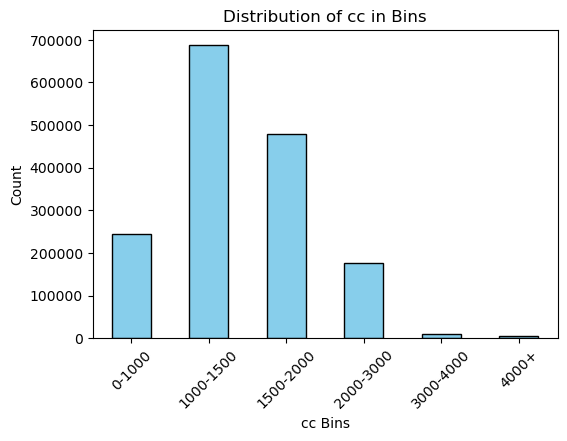

In [38]:
plt.figure(figsize = (6,4))
grouped_data['cc'].value_counts(sort=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of cc in Bins')
plt.xlabel('cc Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [39]:
grouped_data[grouped_data['policy_no']=='V6323538']

,policy_no,inception_date_final,expiry_date,split,gwp,xc_gwp_prv,gr_comm_amount,sum_insured,branch,cust_type,cust_post_code,cust_state,cust_gender,cust_age,vehicle_id,vehicle_age,make,model,cc,policy_type,xc_veh_new_ren_ind,xc_veh_renewal_no,xc_policy_no_prv,xc_inception_date_final_prv,xc_expiry_date_prv,xc_contract_type_prv,xc_cover_prv,xc_sum_insured_prv,xc_loading_prv,xc_ncb_perc_prv,xc_disc_perc_prv,xc_veh_lost_ren_ind,ncb_perc,disc_perc,comm_perc,loading,basic_prem,disc_amount,pref_segment,dim_pol_sum_insured,dim_pol_veh_sum_insured,comm_1_amount
1110584,V6323538,2022-05-09,2023-05-08,ACT,327.98,1615.88,32.799361,54080.0,B5,P,43200.0,MAL,M,47.0,VAA9455,6,MAZDA,BT50,2000-3000,N,R,3,V4979164,2021-04-28,2022-04-27,CVP,CO,55000.0,100.0,0.0,0.0,R,0.0,0.0,10.0,100,1917.41,0.0,0,54080.0,54080.0,0.0
1110585,V6323538,2022-05-09,2023-05-08,NONACT,1841.43,1615.88,184.150639,54080.0,B5,P,43200.0,MAL,M,47.0,VAA9455,6,MAZDA,BT50,2000-3000,N,R,3,V4979164,2021-04-28,2022-04-27,CVP,CO,55000.0,100.0,0.0,0.0,R,0.0,0.0,10.0,100,1917.41,0.0,0,54080.0,54080.0,0.0


## **CLAIM DATA**

In [40]:
claim_data.head()

,src_system,paid_count_flag,os_count_flag,claim_count_flag,claim_type_paid_count_flag,claim_type_os_count_flag,claim_type_count_flag,split,ac_date,uw_date,inception_date_new,expiry_date,claim_no,policy_no,vehicle_no,sum_insured,branch,rm_no,rm_name,pref_segment,policy_type,policy_status,cancel_status,dim_pol_sum_insured,dim_pol_veh_sum_insured,agent_no,agent_name,account_class,major_class,major_class_t5,major_class_bnm,cover,contract_type,risk_type,premium_class,nvic,vehicle_class,vehicle_class_desc,use_motor,use_desc,make,model,year_manu,cause_type,claim_status,xc_claim_status,xc_ac_claim_status,vehicle_age,reserve_code,reserve_desc,reserve_group_code,date_reported_new,file_open_date_new,loss_date_new,paid_tran_date_new,closure_date,diff_days_loss_inception,diff_days_reported_inception,diff_days_reported_intimated,diff_days_close_reported,diff_days_close_inception,gic,nic,gpd,gos,npd,nos,gos_cbal,gos_obal,nos_cbal,nos_obal,cust_no,cust_type,cust_new_ic,cust_name,cust_dob,cust_post_code,cust_state,cust_gender,cust_age,cc,xc_veh_new_ren_ind,xc_veh_renewal_no,xc_policy_no_prv,xc_inception_date_final_prv,xc_expiry_date_prv,xc_contract_type_prv,xc_cover_prv,xc_sum_insured_prv,xc_loading_prv,xc_ncb_perc_prv,xc_disc_perc_prv,xc_gwp_prv,xc_veh_lost_ren_ind,xc_policy_no_nxt,xc_inception_date_final_nxt,xc_expiry_date_nxt,xc_contract_type_nxt,xc_cover_nxt,xc_sum_insured_nxt,xc_loading_nxt,xc_ncb_perc_nxt,xc_disc_perc_nxt,xc_gwp_nxt,loading,ncb_perc,disc_perc,comm_perc,basic_prem,purchase_price,nop_claimed,noc_total,noc_paid,noc_os,nop_claimed_split,noc_total_split,noc_paid_split,noc_os_split,contract_type_code,contract_type_short_desc,contract_type_long_desc,src_contract_type_long,src_sys_id
0,AS400,N,N,Y,N,N,Y,NONACT,2023-04-01,2022-11-01,2022-11-20,2023-11-19,V0197505,V5386034,MDH5381,60000,PM,2231918,MUHAMMAD SHAFIZ SIDIK(A/C TAGGING),0,N,New Business,New Business,60000.0,60000.0,VP080100,POS MERLIMAU,10,MOT,MOT,MTO,CO,CVP,RVP,PVC,NaN,PC,PRIVATE CAR,MX,PRIVATE CAR - PRIVATE USE,NISSAN,ALMERA,2020,MCY Motorcycling,OPEN,OPEN,OPEN,2,RC,REPAIR COSTS,RPR,2023-03-25,2023-03-27,2023-03-22,2023-04-01,NaN,122,127,2,NaN,NaN,11135.40,10857.01,0.00,11135.40,0.00,10857.01,11135.40,0.00,10857.01,0.00,3101234,P,630421045474,ROZIAH BINTI ASMUNI,1963-04-21,77300.0,MAL,F,59.0,999,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,R,V5444584,2023-11-20,2024-11-19,CVP,CO,65000.0,NaN,0.0,0.0,2607.896724,100,55.0,0.0,10.0,1627.02,60000.0,0.25,0.25,0.0,0.0,0.5,0.5,0.0,0.0,CVP,M PRIV CAR,MOTOR - PRIVATE CAR,MOTOR - PRIVATE CAR,AS4
1,AS400,Y,N,Y,Y,N,Y,NONACT,2023-04-01,2022-05-01,2022-05-09,2023-05-08,V0197507,V6323538,VAA9455,54080,B5,3206380,CHIN WEI JIN (A/C TAGGING),0,N,New Business,New Business,54080.0,54080.0,V0016924,TK MEGA AGENCY,10,MOT,MOT,MTO,CO,CVP,RVP,PVC,I7N16A,PC,PRIVATE CAR,MX,PRIVATE CAR - PRIVATE USE,MAZDA,BT50,2016,TPI TP hit insured rear,CLOSED,CLOSED,OPEN,6,AF,ADJUSTER FEES,FEE,2023-03-24,2023-03-27,2023-03-06,2023-04-04,NaN,301,322,3,NaN,NaN,50.00,48.75,50.00,0.00,48.75,0.00,0.00,0.00,0.00,0.00,2819305,P,741123085381,SIVASUBRAMANIAM A/L RAMASAMY,1974-11-23,43200.0,MAL,M,47.0,2198,R,3,V4979164,2021-04-28,2022-04-27,CVP,CO,55000.0,100.0,0.0,0.0,3231.76,R,V6834758,2023-07-14,2024-07-13,CVP,CO,52910.0,100.0,25.0,0.0,2765.515148,100,0.0,0.0,10.0,1917.41,54080.0,0.50,0.50,1.0,0.0,0.5,0.5,1.0,0.0,CVP,M PRIV CAR,MOTOR - PRIVATE CAR,MOTOR - PRIVATE CAR,AS4
2,AS400,N,N,N,Y,N,N,NONACT,2023-06-01,2022-05-01,2022-05-09,2023-05-08,V0197507,V6323538,VAA9455,54080,B5,3206380,CHIN WEI JIN (A/C TAGGING),0,N,New Business,New Business,54080.0,54080.0,V0016924,TK MEGA AGENCY,10,MOT,MOT,MTO,CO,CVP,RVP,PVC,I7N16A,PC,PRIVATE CAR,MX,PRIVATE CAR - PRIVATE USE,MAZDA,BT50,2016,TPI TP hit insured rear,CLOSED,CLOSED,CLOSED,6,RC,REPAIR COSTS,RPR,2023-03-24,2023-03-27,2023-03-06,2023-06-06,2023-06-06,301,322,3,71.0,393.0,2055.55,2004.16,2055.55,0.00,2004.16,0.00,0.00,0.00,0.00,0.00,2819305,P,741123085381,SIVASUBRAMANIAM A/L RAMASAMY,1974-11-23,43200.0,MAL,M,47.0,2198,R,3,V4

In [41]:
claim_data.shape

(491804, 123)

In [42]:
different_statuses = claim_data[claim_data['nop_claimed'] != claim_data['noc_total']]

# Check if there are any rows with different values
if not different_statuses.empty:
    print("There are rows with different 'nop_claimed' and 'noc_total'.")
    print(different_statuses.shape[0])
else:
    print("No rows with different 'nop_claimed' and 'noc_total'.")


No rows with different 'nop_claimed' and 'noc_total'.


In [43]:
col_claim_but_not_pol = set(claim_data.columns) - set(grouped_data.columns)
print(f'no of columns to check to remove or keep :{len(col_claim_but_not_pol)}')

no of columns to check to remove or keep :87


In [44]:
data2 = claim_data.copy()
data2 = data2.drop(['ac_date',
 'account_class',
 'agent_name',
 'agent_no',
 'cancel_status',
 'cause_type',
'claim_count_flag','claim_status','claim_type_count_flag','claim_type_os_count_flag',
 'closure_date',
 'claim_type_paid_count_flag', 
'claim_no',              
'gos',
 'gos_cbal',
 'gos_obal',
 'gpd',
 'loss_date_new',
 'nic', 'nos',
 'nos_cbal',
 'nos_obal',
 'npd',
  'noc_os',
 'diff_days_close_inception',
 'diff_days_close_reported',
 'diff_days_loss_inception',
 'diff_days_reported_inception',
 'diff_days_reported_intimated',
 'nvic','reserve_desc', 'reserve_code',
 'reserve_group_code',
 'date_reported_new','file_open_date_new','paid_tran_date_new',	
 'contract_type',
 'contract_type_code',
 'contract_type_long_desc',
 'contract_type_short_desc',
 'cover',
 'cust_dob',
 'cust_name',
 'cust_new_ic',
 'cust_no',
 
 'major_class',
 'major_class_bnm',
 'major_class_t5',
 
 'os_count_flag',
 'paid_count_flag',
 'policy_status',
 'premium_class',
 
 'rm_name',
 'rm_no',
 'src_contract_type_long',
 'src_sys_id',
 'src_system',
 'use_desc',
 'use_motor',
 'uw_date',
 'vehicle_class',
 'vehicle_class_desc',
 'vehicle_no',
 'xc_ac_claim_status',
 'xc_claim_status',
 'xc_contract_type_nxt',
 'xc_cover_nxt',
 'xc_disc_perc_nxt',
 'xc_expiry_date_nxt',
 'xc_gwp_nxt',
 'xc_inception_date_final_nxt',
 'xc_loading_nxt',
 'xc_ncb_perc_nxt',
 'xc_policy_no_nxt',
 'xc_sum_insured_nxt',
 'year_manu',
 'nop_claimed','noc_paid','nop_claimed_split','noc_paid_split','noc_os_split'
                   
                   ],axis=1)

In [45]:
data2.head()

,split,inception_date_new,expiry_date,policy_no,sum_insured,branch,pref_segment,policy_type,dim_pol_sum_insured,dim_pol_veh_sum_insured,risk_type,make,model,vehicle_age,gic,cust_type,cust_post_code,cust_state,cust_gender,cust_age,cc,xc_veh_new_ren_ind,xc_veh_renewal_no,xc_policy_no_prv,xc_inception_date_final_prv,xc_expiry_date_prv,xc_contract_type_prv,xc_cover_prv,xc_sum_insured_prv,xc_loading_prv,xc_ncb_perc_prv,xc_disc_perc_prv,xc_gwp_prv,xc_veh_lost_ren_ind,loading,ncb_perc,disc_perc,comm_perc,basic_prem,purchase_price,noc_total,noc_total_split
0,NONACT,2022-11-20,2023-11-19,V5386034,60000,PM,0,N,60000.0,60000.0,RVP,NISSAN,ALMERA,2,11135.40,P,77300.0,MAL,F,59.0,999,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,R,100,55.0,0.0,10.0,1627.02,60000.0,0.25,0.5
1,NONACT,2022-05-09,2023-05-08,V6323538,54080,B5,0,N,54080.0,54080.0,RVP,MAZDA,BT50,6,50.00,P,43200.0,MAL,M,47.0,2198,R,3,V4979164,2021-04-28,2022-04-27,CVP,CO,55000.0,100.0,0.0,0.0,3231.76,R,100,0.0,0.0,10.0,1917.41,54080.0,0.50,0.5
2,NONACT,2022-05-09,2023-05-08,V6323538,54080,B5,0,N,54080.0,54080.0,RVP,MAZDA,BT50,6,2055.55,P,43200.0,MAL,M,47.0,2198,R,3,V4979164,2021-04-28,2022-04-27,CVP,CO,55000.0,100.0,0.0,0.0,3231.76,R,100,0.0,0.0,10.0,1917.41,54080.0,0.00,0.0
3,NONACT,2022-05-09,2023-05-08,V6323538,54080,B5,0,N,54080.0,54080.0,RVP,MAZDA,BT50,6,-2055.55,P,43200.0,MAL,M,47.0,2198,R,3,V4979164,2021-04-28,2022-04-27,CVP,CO,55000.0,100.0,0.0,0.0,3231.76,R,100,0.0,0.0,10.0,1917.41,54080.0,0.00,0.0
4,NONACT,2022-05-09,2023-05-08,V6323538,54080,B5,0,N,54080.0,54080.0,RVP,MAZDA,BT50,6,2055.55,P,43200.0,MAL,M,47.0,2198,R,3,V4979164,2021-04-28,2022-04-27,CVP,CO,55000.0,100.0,0.0,0.0,3231.76,R,100,0.0,0.0,10.0,1917.41,54080.0,0.50,0.5


In [46]:
data2.shape

(491804, 42)

In [47]:
# data2[data2['policy_no' == '']]
# claim_data[claim_data['claim_no'] == 'V0197507']

In [48]:
data2['risk_type'].unique()

array(['RVP'], dtype=object)

In [49]:
data2 = data2.sort_values(by = ['policy_no','inception_date_new'])
# data2.head(80)

In [50]:
data2['split'].unique()

array(['NONACT', 'ACT'], dtype=object)

In [51]:
data2['gic'].nunique()

59834

#### There is 1:M relation of no of policy to no of claims due to multiple vehicle risks
#### Also, there is 0:N relation to it when they forgot to input the policy id while creating claims or the claims were raised after a long duration.

In [52]:
data2.rename(columns={'inception_date_new': 'inception_date_final'}, inplace=True)
data2.head()

,split,inception_date_final,expiry_date,policy_no,sum_insured,branch,pref_segment,policy_type,dim_pol_sum_insured,dim_pol_veh_sum_insured,risk_type,make,model,vehicle_age,gic,cust_type,cust_post_code,cust_state,cust_gender,cust_age,cc,xc_veh_new_ren_ind,xc_veh_renewal_no,xc_policy_no_prv,xc_inception_date_final_prv,xc_expiry_date_prv,xc_contract_type_prv,xc_cover_prv,xc_sum_insured_prv,xc_loading_prv,xc_ncb_perc_prv,xc_disc_perc_prv,xc_gwp_prv,xc_veh_lost_ren_ind,loading,ncb_perc,disc_perc,comm_perc,basic_prem,purchase_price,noc_total,noc_total_split
258988,NONACT,2021-01-16,2022-01-15,V0115010,7000,A1,0,R,7000.0,7000.0,RVP,PROTON,WAJA,20,0.0,P,31400.0,MAL,M,53.0,1584,R,7,V0115010,2020-01-16,2021-01-15,CVP,CO,8000.0,115.0,55.0,0.0,401.015423,R,115,55.0,0.0,10.0,484.69,0.0,0.0,0.0
258989,NONACT,2021-01-16,2022-01-15,V0115010,7000,A1,0,R,7000.0,7000.0,RVP,PROTON,WAJA,20,0.0,P,31400.0,MAL,M,53.0,1584,R,7,V0115010,2020-01-16,2021-01-15,CVP,CO,8000.0,115.0,55.0,0.0,401.015423,R,115,55.0,0.0,10.0,484.69,0.0,0.0,0.0
258990,NONACT,2021-01-16,2022-01-15,V0115010,7000,A1,0,R,7000.0,7000.0,RVP,PROTON,WAJA,20,0.0,P,31400.0,MAL,M,53.0,1584,R,7,V0115010,2020-01-16,2021-01-15,CVP,CO,8000.0,115.0,55.0,0.0,401.015423,R,115,55.0,0.0,10.0,484.69,0.0,0.0,0.0
258991,NONACT,2021-01-16,2022-01-15,V0115010,7000,A1,0,R,7000.0,7000.0,RVP,PROTON,WAJA,20,0.0,P,31400.0,MAL,M,53.0,1584,R,7,V0115010,2020-01-16,2021-01-15,CVP,CO,8000.0,115.0,55.0,0.0,401.015423,R,115,55.0,0.0,10.0,484.69,0.0,0.0,0.0
258992,NONACT,2021-01-16,2022-01-15,V0115010,7000,A1,0,R,7000.0,7000.0,RVP,PROTON,WAJA,20,0.0,P,31400.0,MAL,M,53.0,1584,R,7,V0115010,2020-01-16,2021-01-15,CVP,CO,8000.0,115.0,55.0,0.0,401.015423,R,115,55.0,0.0,10.0,484.69,0.0,0.0,0.0


In [53]:
data2.columns

Index(['split', 'inception_date_final', 'expiry_date', 'policy_no',
       'sum_insured', 'branch', 'pref_segment', 'policy_type',
       'dim_pol_sum_insured', 'dim_pol_veh_sum_insured', 'risk_type', 'make',
       'model', 'vehicle_age', 'gic', 'cust_type', 'cust_post_code',
       'cust_state', 'cust_gender', 'cust_age', 'cc', 'xc_veh_new_ren_ind',
       'xc_veh_renewal_no', 'xc_policy_no_prv', 'xc_inception_date_final_prv',
       'xc_expiry_date_prv', 'xc_contract_type_prv', 'xc_cover_prv',
       'xc_sum_insured_prv', 'xc_loading_prv', 'xc_ncb_perc_prv',
       'xc_disc_perc_prv', 'xc_gwp_prv', 'xc_veh_lost_ren_ind', 'loading',
       'ncb_perc', 'disc_perc', 'comm_perc', 'basic_prem', 'purchase_price',
       'noc_total', 'noc_total_split'],
      dtype='object')

In [54]:
grouped_data2 = data2.groupby(['policy_no','inception_date_final','expiry_date','split'], as_index = False).agg({
    'gic':'sum','xc_gwp_prv':'sum','noc_total':'sum',
    
    'sum_insured':'first', 'branch':'first', 'pref_segment':'first', 'policy_type':'first',
       'dim_pol_sum_insured':'first', 'dim_pol_veh_sum_insured':'first', 'risk_type':'first', 'make':'first',
       'model':'first', 'vehicle_age':'first', 'cust_type':'first', 'cust_post_code':'first',
       'cust_state':'first', 'cust_gender':'first', 'cust_age':'first', 'cc':'first', 'xc_veh_new_ren_ind':'first',
       'xc_veh_renewal_no':'first', 'xc_policy_no_prv':'first', 'xc_inception_date_final_prv':'first',
       'xc_expiry_date_prv':'first', 'xc_contract_type_prv':'first', 'xc_cover_prv':'first',
       'xc_sum_insured_prv':'first', 'xc_loading_prv':'first', 'xc_ncb_perc_prv':'first',
       'xc_disc_perc_prv':'first', 'xc_veh_lost_ren_ind':'first', 'loading':'first',
       'ncb_perc':'first', 'disc_perc':'first', 'comm_perc':'first', 'basic_prem':'first', 'purchase_price':'first',
     'noc_total_split':'first'
    
})

In [55]:
grouped_data2.shape

(60541, 42)

In [56]:
grouped_data2.head()

,policy_no,inception_date_final,expiry_date,split,gic,xc_gwp_prv,noc_total,sum_insured,branch,pref_segment,policy_type,dim_pol_sum_insured,dim_pol_veh_sum_insured,risk_type,make,model,vehicle_age,cust_type,cust_post_code,cust_state,cust_gender,cust_age,cc,xc_veh_new_ren_ind,xc_veh_renewal_no,xc_policy_no_prv,xc_inception_date_final_prv,xc_expiry_date_prv,xc_contract_type_prv,xc_cover_prv,xc_sum_insured_prv,xc_loading_prv,xc_ncb_perc_prv,xc_disc_perc_prv,xc_veh_lost_ren_ind,loading,ncb_perc,disc_perc,comm_perc,basic_prem,purchase_price,noc_total_split
0,V0115010,2021-01-16,2022-01-15,NONACT,3439.60,21253.817422,1.0,7000,A1,0,R,7000.0,7000.0,RVP,PROTON,WAJA,20,P,31400.0,MAL,M,53.0,1584,R,7,V0115010,2020-01-16,2021-01-15,CVP,CO,8000.0,115.0,55.0,0.0,R,115,55.00,0.0,10.0,484.69,0.0,0.0
1,V0160338,2023-06-19,2024-06-18,NONACT,1442.83,1356.262110,1.0,7100,H2,0,R,7100.0,7100.0,RVP,PERODUA,KELISA,21,P,70300.0,MAL,F,48.0,989,R,9,V0160338,2022-06-19,2023-06-18,CVP,CO,7100.0,115.0,55.0,10.0,R,115,55.00,10.0,0.0,0.00,0.0,0.5
2,V0164787,2021-08-28,2022-08-27,NONACT,889.00,1102.762671,1.0,15600,W1,0,R,15600.0,15600.0,RVP,TOYOTA,VIOS,17,P,52100.0,MAL,F,57.0,1496,R,7,V0164787,2020-08-28,2021-08-27,CVP,CO,16000.0,115.0,30.0,0.0,R,115,38.33,0.0,10.0,719.85,0.0,1.0
3,V0173555,2020-04-18,2021-04-17,NONACT,2937.00,4433.251591,1.0,20000,W1,0,R,20000.0,20000.0,RVP,TOYOTA,COROLLA,18,P,52200.0,MAL,M,50.0,1598,R,6,V0173555,2019-04-18,2020-04-17,CVP,CO,20000.0,115.0,55.0,0.0,R,115,55.00,0.0,10.0,903.69,0.0,0.5
4,V0186345,2022-05-16,2023-05-15,ACT,8417.00,8130.844365,1.0,7000,P1,0,R,7000.0,7000.0,RVP,PROTON,WIRA,21,P,11950.0,MAL,M,58.0,1468,R,8,V0186345,2021-05-16,2022-05-15,CVP,CO,8000.0,115.0,55.0,0.0,R,115,55.00,0.0,10.0,572.53,0.0,0.0


#### We are supposed to append the two policy and claim tables having respective policy rows to have 0 gic, 0 noc_split
#### and respective claims rows to have 0 gwp 

In [57]:
data2.noc_total.value_counts()

noc_total
0.000000    401292
0.500000     43868
1.000000     35713
0.250000      5408
0.333333      5316
0.200000       195
0.166667        12
Name: count, dtype: int64

### Creating bins for 'cc' of vehicles of ranges:

#### 1. 0 - 1000
#### 2. 1000 - 1500
#### 3. 1500 - 2000
#### 4. 2000 - 3000
#### 5. 3000 - 4000
#### 6. 4000+

In [58]:
bins = [0, 1000, 1500, 2000, 3000, 4000, np.inf]

In [59]:
labels = ['0-1000', '1000-1500', '1500-2000', '2000-3000', '3000-4000', '4000+']
grouped_data2['cc'] = pd.cut(grouped_data2['cc'], bins=bins, labels=labels, right=False)

In [60]:
grouped_data2.cc.value_counts()

cc
1000-1500    25943
1500-2000    19204
2000-3000     8447
0-1000        6065
3000-4000      649
4000+          233
Name: count, dtype: int64

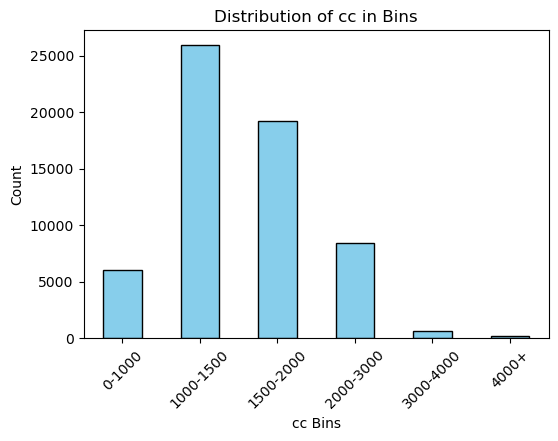

In [61]:
plt.figure(figsize = (6,4))
grouped_data2['cc'].value_counts(sort=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of cc in Bins')
plt.xlabel('cc Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [62]:
print(f'shape of policy_db :{grouped_data.shape}')
print(f'shape of claim_db :{grouped_data2.shape}')

shape of policy_db :(1601765, 42)
shape of claim_db :(60541, 42)


In [63]:
# Columns which are there in policy(grouped_data) and not in claim db(grouped_data2)
columns_dif1 = set(grouped_data.columns) - set(grouped_data2.columns)
columns_dif1

{'comm_1_amount', 'disc_amount', 'gr_comm_amount', 'gwp', 'vehicle_id'}

In [64]:
# Columns which are not there in policy(grouped_data) and in claim db(grouped_data2)
columns_dif2 = set(grouped_data2.columns) - set(grouped_data.columns)
columns_dif2

{'gic', 'noc_total', 'noc_total_split', 'purchase_price', 'risk_type'}

## **FINAL DB**

#### Concatenated & appended dataframe of PolicyDB and ClaimDB

In [65]:
# List of common columns between policy and claim dbs
commons = [col for col in grouped_data.columns if col in data2.columns]
# len(commons)
# commons

In [66]:
col_claim_but_not_pol = set(data2.columns) - set(claim_data.columns)
col_claim_but_not_pol

{'inception_date_final'}

In [67]:
policy_common = grouped_data[commons]
policy_common['gwp'] = grouped_data['gwp']
policy_common['gic'] = 0
policy_common['noc_total'] = 0

claim_common = grouped_data2[commons]
claim_common['gwp'] = 0
claim_common['gic'] = grouped_data2['gic']
claim_common['noc_total'] = grouped_data2['noc_total']

final_columns_order = commons + ['gwp', 'gic', 'noc_total']

C:\Users\ananya.datta\AppData\Local\Temp\ipykernel_16068\578694396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policy_common['gwp'] = grouped_data['gwp']
C:\Users\ananya.datta\AppData\Local\Temp\ipykernel_16068\578694396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policy_common['gic'] = 0
C:\Users\ananya.datta\AppData\Local\Temp\ipykernel_16068\578694396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [68]:
combined = pd.concat([policy_common, claim_common], ignore_index=True)

In [69]:
combined.columns

Index(['policy_no', 'inception_date_final', 'expiry_date', 'split',
       'xc_gwp_prv', 'sum_insured', 'branch', 'cust_type', 'cust_post_code',
       'cust_state', 'cust_gender', 'cust_age', 'vehicle_age', 'make', 'model',
       'cc', 'policy_type', 'xc_veh_new_ren_ind', 'xc_veh_renewal_no',
       'xc_policy_no_prv', 'xc_inception_date_final_prv', 'xc_expiry_date_prv',
       'xc_contract_type_prv', 'xc_cover_prv', 'xc_sum_insured_prv',
       'xc_loading_prv', 'xc_ncb_perc_prv', 'xc_disc_perc_prv',
       'xc_veh_lost_ren_ind', 'ncb_perc', 'disc_perc', 'comm_perc', 'loading',
       'basic_prem', 'pref_segment', 'dim_pol_sum_insured',
       'dim_pol_veh_sum_insured', 'gwp', 'gic', 'noc_total'],
      dtype='object')

In [70]:
combined.shape

(1662306, 40)

In [71]:
# to check total no of matching columns
common_rows = pd.merge(policy_common[commons], claim_common[commons], 
                       on=['policy_no', 'inception_date_final', 'expiry_date', 'split'], 
                       how='inner')
common_rows.shape

(60461, 70)

In [72]:
# Group by the key columns and sum the relevant columns
grouped = combined.groupby(['policy_no', 'inception_date_final', 'expiry_date', 'split'], as_index=False).agg({
    'gwp': 'sum',  # Sum 'gwp' column
    'gic': 'sum',  # Sum 'gic' column
    'noc_total': 'sum', # Sum 'noc_total' column
    'xc_gwp_prv':'first','sum_insured':'first', 'branch':'first', 'cust_type':'first', 'cust_post_code':'first',
       'cust_state':'first', 'cust_gender':'first', 'cust_age':'first', 'vehicle_age':'first', 'make':'first', 'model':'first',
       'cc':'first', 'policy_type':'first', 'xc_veh_new_ren_ind':'first', 'xc_veh_renewal_no':'first',
       'xc_policy_no_prv':'first', 'xc_inception_date_final_prv':'first', 'xc_expiry_date_prv':'first',
       'xc_contract_type_prv':'first', 'xc_cover_prv':'first', 'xc_sum_insured_prv':'first',
       'xc_loading_prv':'first', 'xc_ncb_perc_prv':'first', 'xc_disc_perc_prv':'first',
       'xc_veh_lost_ren_ind':'first', 'ncb_perc':'first', 'disc_perc':'first', 'comm_perc':'first', 'loading':'first',
       'basic_prem':'first', 'pref_segment':'first', 'dim_pol_sum_insured':'first',
       'dim_pol_veh_sum_insured':'first'
})

In [73]:
grouped.shape

(1601845, 40)

In [74]:
grouped[grouped['split']=='NONACT'].shape

(801646, 40)

In [75]:
grouped[grouped['split']=='ACT'].shape

(800199, 40)

In [76]:
naDB = grouped[grouped['split']=='NONACT']
aDB = grouped[grouped['split']=='ACT']

In [77]:
naDB.columns

Index(['policy_no', 'inception_date_final', 'expiry_date', 'split', 'gwp',
       'gic', 'noc_total', 'xc_gwp_prv', 'sum_insured', 'branch', 'cust_type',
       'cust_post_code', 'cust_state', 'cust_gender', 'cust_age',
       'vehicle_age', 'make', 'model', 'cc', 'policy_type',
       'xc_veh_new_ren_ind', 'xc_veh_renewal_no', 'xc_policy_no_prv',
       'xc_inception_date_final_prv', 'xc_expiry_date_prv',
       'xc_contract_type_prv', 'xc_cover_prv', 'xc_sum_insured_prv',
       'xc_loading_prv', 'xc_ncb_perc_prv', 'xc_disc_perc_prv',
       'xc_veh_lost_ren_ind', 'ncb_perc', 'disc_perc', 'comm_perc', 'loading',
       'basic_prem', 'pref_segment', 'dim_pol_sum_insured',
       'dim_pol_veh_sum_insured'],
      dtype='object')

In [78]:
naDB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801646 entries, 1 to 1601844
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   policy_no                    801646 non-null  object  
 1   inception_date_final         801646 non-null  object  
 2   expiry_date                  801646 non-null  object  
 3   split                        801646 non-null  object  
 4   gwp                          801646 non-null  float64 
 5   gic                          801646 non-null  float64 
 6   noc_total                    801646 non-null  float64 
 7   xc_gwp_prv                   801646 non-null  float64 
 8   sum_insured                  801646 non-null  float64 
 9   branch                       801646 non-null  object  
 10  cust_type                    801646 non-null  object  
 11  cust_post_code               801627 non-null  float64 
 12  cust_state                   801646 non-null  ob

In [79]:
naDB['cc'].unique()

['2000-3000', '1500-2000', '1000-1500', '0-1000', '3000-4000', '4000+']
Categories (6, object): ['0-1000' < '1000-1500' < '1500-2000' < '2000-3000' < '3000-4000' < '4000+']

In [80]:
naDB.loc[:, 'cc'] = naDB['cc'].astype('object')
aDB.loc[:, 'cc'] = aDB['cc'].astype('object')

In [81]:
# Define empty lists for numerical and categorical columns
numerical_columns = []
categorical_columns = []

# Loop through the columns of the DataFrame
for column in naDB.columns:
    # Check the data type of each column
    if naDB[column].dtype in ['int64', 'float64']:  # For numerical columns
        numerical_columns.append(column)
        # if i[column].dtype == 'float64':  # If it's a float column, convert to int cz otherwise u get catBoosterror
        #     i[column] = i[column].astype(np.int64)
    elif naDB[column].dtype == 'object':  # For categorical columns (string type)
        categorical_columns.append(column)

In [82]:
categorical_columns

['policy_no',
 'inception_date_final',
 'expiry_date',
 'split',
 'branch',
 'cust_type',
 'cust_state',
 'cust_gender',
 'make',
 'model',
 'policy_type',
 'xc_veh_new_ren_ind',
 'xc_policy_no_prv',
 'xc_inception_date_final_prv',
 'xc_expiry_date_prv',
 'xc_contract_type_prv',
 'xc_cover_prv',
 'xc_veh_lost_ren_ind']

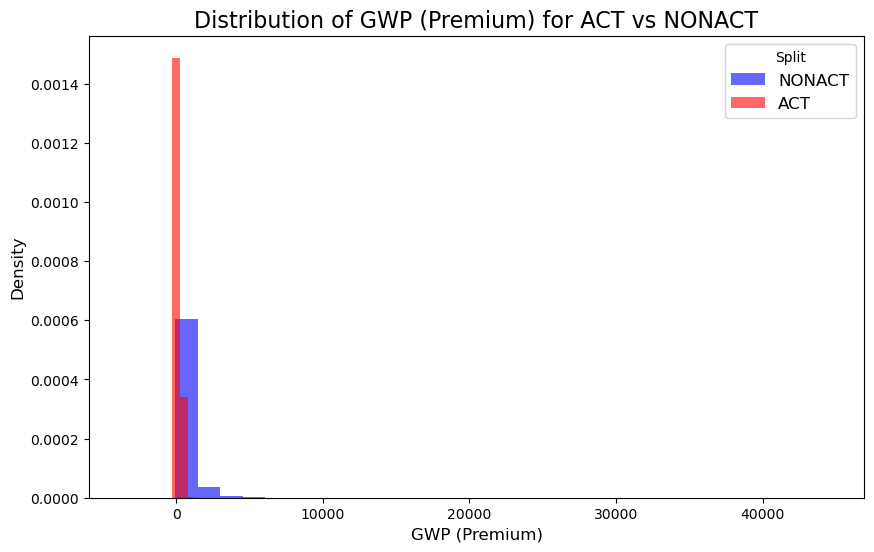

In [83]:
plt.figure(figsize=(10, 6))

# Plot histogram for NONACT GWP
plt.hist(naDB['gwp'], bins=30, alpha=0.6, color='blue', label='NONACT', density=True)

# Plot histogram for ACT GWP
plt.hist(aDB['gwp'], bins=30, alpha=0.6, color='red', label='ACT', density=True)

# Add labels and title
plt.xlabel('GWP (Premium)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of GWP (Premium) for ACT vs NONACT', fontsize=16)

# Add legend
plt.legend(title='Split', fontsize=12)

# Show the plot
plt.show()

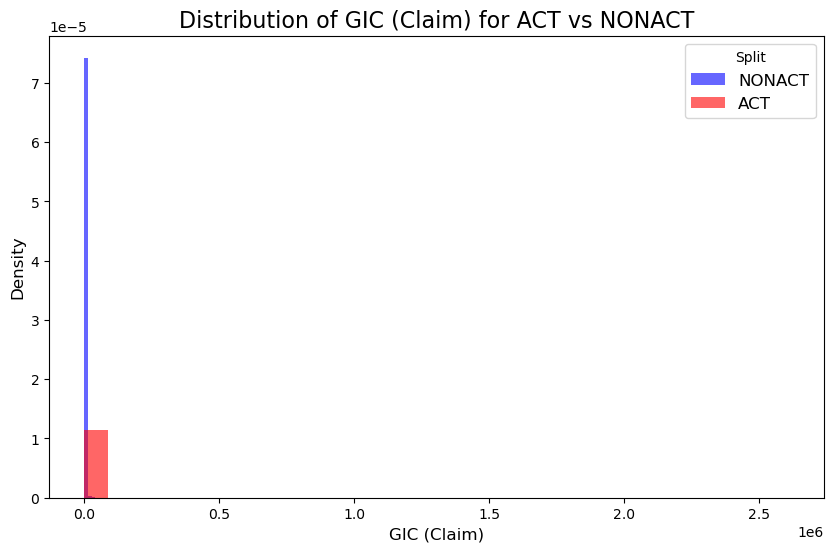

In [84]:
plt.figure(figsize=(10, 6))

# Plot histogram for NONACT GWP
plt.hist(naDB['gic'], bins=30, alpha=0.6, color='blue', label='NONACT', density=True)

# Plot histogram for ACT GWP
plt.hist(aDB['gic'], bins=30, alpha=0.6, color='red', label='ACT', density=True)

# Add labels and title
plt.xlabel('GIC (Claim)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of GIC (Claim) for ACT vs NONACT', fontsize=16)

# Add legend
plt.legend(title='Split', fontsize=12)

# Show the plot
plt.show()

In [85]:
naDB = naDB.drop(['xc_policy_no_prv','xc_inception_date_final_prv','xc_expiry_date_prv','xc_contract_type_prv','xc_cover_prv',
            'xc_sum_insured_prv','xc_loading_prv','xc_ncb_perc_prv','xc_disc_perc_prv'],axis=1)
aDB = aDB.drop(['xc_policy_no_prv','xc_inception_date_final_prv','xc_expiry_date_prv','xc_contract_type_prv','xc_cover_prv',
            'xc_sum_insured_prv','xc_loading_prv','xc_ncb_perc_prv','xc_disc_perc_prv'],axis=1)

In [86]:
column_name = ['cc','cust_age','cust_gender','cust_post_code','make','model' ]
missing_percentage = (naDB[column_name].isnull().sum() / len(naDB)) * 100
print(f"Percentage of missing values in NONACT DB in '{column_name}': \n{missing_percentage}%")

Percentage of missing values in NONACT DB in '['cc', 'cust_age', 'cust_gender', 'cust_post_code', 'make', 'model']': 
cc                0.000000
cust_age          6.187644
cust_gender       6.179037
cust_post_code    0.002370
make              0.499597
model             0.724634
dtype: float64%


In [87]:
column_name = ['cc','cust_age','cust_gender','cust_post_code','make','model' ]
missing_percentage = (aDB[column_name].isnull().sum() / len(aDB)) * 100
print(f"Percentage of missing values in ACT DB in '{column_name}': \n{missing_percentage}%")

Percentage of missing values in ACT DB in '['cc', 'cust_age', 'cust_gender', 'cust_post_code', 'make', 'model']': 
cc                0.000000
cust_age          6.141222
cust_gender       6.132600
cust_post_code    0.002374
make              0.522620
model             0.751938
dtype: float64%


In [88]:
lowerb = 20
upperb = 80
#cap and floor bounds
naDB['cust_age'] = naDB['cust_age'].apply(lambda x: max(min(x,upperb),lowerb))

In [89]:
lowerb = 20
upperb = 80
#cap and floor bounds
aDB['cust_age'] = aDB['cust_age'].apply(lambda x: max(min(x,upperb),lowerb))

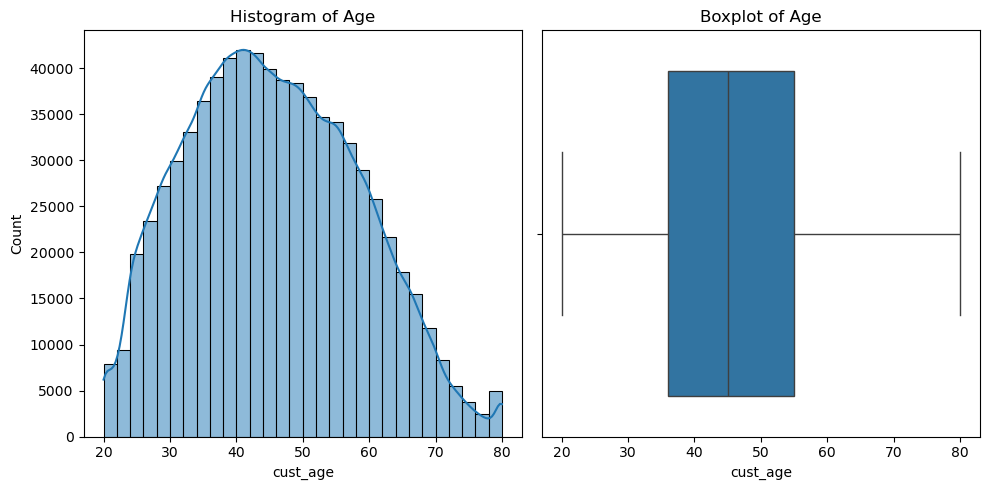

In [90]:
#histogram and boxplots to identify distribution and outliers in customer age
fig,ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(naDB['cust_age'],bins=30,kde=True,ax=ax[0])
ax[0].set_title('Histogram of Age')

sns.boxplot(x=naDB['cust_age'])
ax[1].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()

In [91]:
# Fill the missing values with the sampled values
missing_indices = naDB[naDB['cust_age'].isnull()].index
non_missing_values = naDB['cust_age'].dropna()  # Get non-null values
random_samples = np.random.choice(non_missing_values, size=len(missing_indices), replace=True)
naDB.loc[missing_indices, 'cust_age'] = random_samples

In [92]:
# Fill the missing values with the sampled values
missing_indices = aDB[aDB['cust_age'].isnull()].index
non_missing_values = aDB['cust_age'].dropna()  # Get non-null values
random_samples = np.random.choice(non_missing_values, size=len(missing_indices), replace=True)
aDB.loc[missing_indices, 'cust_age'] = random_samples

In [93]:
# f = f.drop(['age_capped'],axis=1)
missing_list = naDB.isnull().sum()
nonzero = missing_list[missing_list != 0 ]
nonzero

cust_post_code       19
cust_gender       49534
make               4005
model              5809
dtype: int64

In [94]:
# Calculate the proportions of 'M' and 'F' in the entire dataset
gender_counts = naDB['cust_gender'].value_counts(normalize=True)
prob_m = gender_counts.get('M', 0)  # Proportion of 'M'
prob_f = gender_counts.get('F', 0)  # Proportion of 'F'
# to make probabilities add up to 1, since not considering T
total_prob = prob_m + prob_f
if total_prob != 1:
    prob_m /= total_prob
    prob_f /= total_prob

In [95]:
# Define the imputation function
def fill_gender(row):
    if pd.isna(row['cust_gender']):
        # Sample a gender based on the overall proportions
        return np.random.choice(['M', 'F'], p=[prob_m, prob_f])
    return row['cust_gender']

In [96]:
naDB['cust_gender'] = naDB.apply(fill_gender, axis=1)
print(naDB['cust_gender'].isnull().sum())  # Should now be 0 if all missing values are filled

0


In [97]:
# Calculate the proportions of 'M' and 'F' in the entire dataset
gender_counts = aDB['cust_gender'].value_counts(normalize=True)
prob_m = gender_counts.get('M', 0)  # Proportion of 'M'
prob_f = gender_counts.get('F', 0)  # Proportion of 'F'
# to make probabilities add up to 1, since not considering T
total_prob = prob_m + prob_f
if total_prob != 1:
    prob_m /= total_prob
    prob_f /= total_prob

In [98]:
aDB['cust_gender'] = aDB.apply(fill_gender, axis=1)
print(aDB['cust_gender'].isnull().sum())  # Should now be 0 if all missing values are filled

0


In [99]:
naDB.shape

(801646, 31)

In [100]:
aDB.shape

(800199, 31)

In [101]:
# drop the rows having missing cc(2), cust_post_date(38)
naDB = naDB.dropna(subset = [ 'cust_post_code','make'])
aDB = aDB.dropna(subset = [ 'cust_post_code','make'])

In [102]:
aDB.isnull().sum()


policy_no                     0
inception_date_final          0
expiry_date                   0
split                         0
gwp                           0
gic                           0
noc_total                     0
xc_gwp_prv                    0
sum_insured                   0
branch                        0
cust_type                     0
cust_post_code                0
cust_state                    0
cust_gender                   0
cust_age                      0
vehicle_age                   0
make                          0
model                      1835
cc                            0
policy_type                   0
xc_veh_new_ren_ind            0
xc_veh_renewal_no             0
xc_veh_lost_ren_ind           0
ncb_perc                      0
disc_perc                     0
comm_perc                     0
loading                       0
basic_prem                    0
pref_segment                  0
dim_pol_sum_insured           0
dim_pol_veh_sum_insured       0
dtype: i

In [103]:
naDB = naDB.drop(['xc_gwp_prv','xc_veh_new_ren_ind','disc_perc','xc_veh_lost_ren_ind','comm_perc','loading','basic_prem','dim_pol_sum_insured','dim_pol_veh_sum_insured'],axis=1)
aDB = aDB.drop(['xc_gwp_prv','xc_veh_new_ren_ind','disc_perc','xc_veh_lost_ren_ind','comm_perc','loading','basic_prem','dim_pol_sum_insured','dim_pol_veh_sum_insured'],axis=1)


In [104]:
naDB.shape

(797622, 22)

In [105]:
aDB.shape

(795998, 22)

In [106]:
model_distribution = naDB['model'].dropna().value_counts()
top10 = model_distribution.head(10)
print(model_distribution.head(10))

model
MYVI       70438
SAGA       57999
WIRA       43497
KANCIL     38891
VIOS       34698
WAJA       27856
VIVA       24765
AXIA       24459
CITY       21064
PERSONA    20454
Name: count, dtype: int64


In [107]:
model_proportions = top10 / top10.sum()

# Generate a list of model values to fill in the missing 'model' entries, proportionally
missing_indices = naDB[naDB['model'].isnull()].index

# Sample from the top 10 models using the calculated proportions
fill_values = np.random.choice(top10.index, size=len(missing_indices), p=model_proportions)

# Fill the missing values in the 'model' column
naDB.loc[missing_indices, 'model'] = fill_values

# Verify that there are no missing values left
print(naDB['model'].isnull().sum())

0


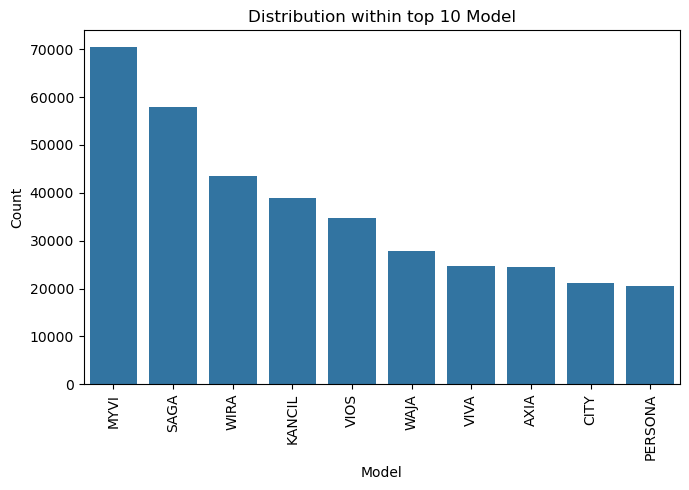

In [108]:
plt.figure(figsize = (7,5))
sns.barplot(x = top10.index, y=top10.values)
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Distribution within top 10 Model')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [109]:
model_distribution = aDB['model'].dropna().value_counts()
top10 = model_distribution.head(10)
print(model_distribution.head(10))

model
MYVI       70413
SAGA       57986
WIRA       43482
KANCIL     38886
VIOS       34689
WAJA       27845
VIVA       24759
AXIA       24440
CITY       21045
PERSONA    20450
Name: count, dtype: int64


In [110]:
model_proportions = top10 / top10.sum()

# Generate a list of model values to fill in the missing 'model' entries, proportionally
missing_indices = aDB[aDB['model'].isnull()].index

# Sample from the top 10 models using the calculated proportions
fill_values = np.random.choice(top10.index, size=len(missing_indices), p=model_proportions)

# Fill the missing values in the 'model' column
aDB.loc[missing_indices, 'model'] = fill_values

# Verify that there are no missing values left
print(aDB['model'].isnull().sum())

0


In [111]:
# checking out value ranges
numerical_columns = ['gwp', 'sum_insured', 'gic'] 

range_values = naDB[numerical_columns].agg(['min', 'max'])

# Display the range values
print(range_values)

          gwp  sum_insured       gic
min  -1596.59          0.0       0.0
max  44517.44   18750000.0  402101.2


In [112]:
# checking out value ranges
numerical_columns = ['gwp', 'sum_insured', 'gic'] 

range_values = aDB[numerical_columns].agg(['min', 'max'])

# Display the range values
print(range_values)

          gwp  sum_insured        gic
min  -3537.06       2000.0        0.0
max  12823.55    9600000.0  2610163.0


In [113]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
i = naDB.copy()
j = aDB.copy()

NameError: name 'naDB' is not defined

In [292]:
i.columns

Index(['policy_no', 'inception_date_final', 'expiry_date', 'split', 'gwp',
       'gic', 'noc_total', 'sum_insured', 'branch', 'cust_type',
       'cust_post_code', 'cust_state', 'cust_gender', 'cust_age',
       'vehicle_age', 'make', 'model', 'cc', 'policy_type',
       'xc_veh_renewal_no', 'ncb_perc', 'pref_segment'],
      dtype='object')

In [293]:
i = i.drop(['policy_no','split'],axis=1)
j = j.drop(['policy_no','split'],axis=1)

In [294]:
i.head()

,inception_date_final,expiry_date,gwp,gic,noc_total,sum_insured,branch,cust_type,cust_post_code,cust_state,cust_gender,cust_age,vehicle_age,make,model,cc,policy_type,xc_veh_renewal_no,ncb_perc,pref_segment
1,2020-10-14,2021-10-13,582.07,0.0,0.0,15000.0,W1,P,54000.0,MAL,F,63.0,24,MERCEDES BENZ,E230,2000-3000,R,6,55.0,1
3,2020-03-25,2021-03-24,131.71,0.0,0.0,8000.0,W1,P,47400.0,MAL,F,60.0,26,PROTON,WIRA,1500-2000,R,6,55.0,0
5,2021-03-25,2022-03-24,139.46,0.0,0.0,7000.0,W1,P,47400.0,MAL,F,61.0,27,PROTON,WIRA,1500-2000,R,7,55.0,0
7,2022-03-25,2023-03-24,226.91,0.0,0.0,0.0,W1,P,47400.0,MAL,F,62.0,28,PROTON,WIRA,1500-2000,R,8,55.0,0
9,2020-03-02,2021-03-01,113.57,0.0,0.0,6000.0,W1,P,56000.0,MAL,F,60.0,23,PROTON,WIRA,1500-2000,R,6,55.0,0


In [295]:
i.shape

(797622, 20)

In [296]:
i['inception_date_final'] = pd.to_datetime(i['inception_date_final'])  # Ensure 'inception_date' is in datetime format
j['inception_date_final'] = pd.to_datetime(j['inception_date_final'])

In [297]:
i['inception_year'] = i['inception_date_final'].dt.year
i['inception_month'] = i['inception_date_final'].dt.month

j['inception_year'] = j['inception_date_final'].dt.year
j['inception_month'] = j['inception_date_final'].dt.month

In [298]:
i.drop(columns=['inception_date_final', 'expiry_date','gic','noc_total'], inplace=True)
j.drop(columns=['inception_date_final', 'expiry_date','gic','noc_total'], inplace=True)

In [299]:
i.shape
# i.head()

(797622, 18)

In [300]:
i.dtypes

gwp                   float64
sum_insured           float64
branch                 object
cust_type              object
cust_post_code        float64
cust_state             object
cust_gender            object
cust_age              float64
vehicle_age             int64
make                   object
model                  object
cc                   category
policy_type            object
xc_veh_renewal_no       int64
ncb_perc              float64
pref_segment            int64
inception_year          int32
inception_month         int32
dtype: object

In [301]:
i["inception_year"] = i["inception_year"].astype('int64')
i["inception_month"] = i["inception_month"].astype('int64')
i["cc"] = i["cc"].astype('object')

In [302]:
j.dtypes

gwp                   float64
sum_insured           float64
branch                 object
cust_type              object
cust_post_code        float64
cust_state             object
cust_gender            object
cust_age              float64
vehicle_age             int64
make                   object
model                  object
cc                   category
policy_type            object
xc_veh_renewal_no       int64
ncb_perc              float64
pref_segment            int64
inception_year          int32
inception_month         int32
dtype: object

In [303]:
j["inception_year"] = j["inception_year"].astype('int64')
j["inception_month"] = j["inception_month"].astype('int64')
j["cc"] = j["cc"].astype('object')

In [223]:
j.shape

(795998, 18)

In [128]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [304]:
# Define empty lists for numerical and categorical columns
numerical_columns = []
categorical_columns = []

# Loop through the columns of the DataFrame
for column in i.columns:
    # Check the data type of each column
    if i[column].dtype in ['int64', 'float64']:  # For numerical columns
        numerical_columns.append(column)
        if i[column].dtype == 'float64':  # If it's a float column, convert to int cz otherwise u get catBoosterror
            i[column] = i[column].astype(np.int64)
    elif i[column].dtype == 'object':  # For categorical columns (string type)
        categorical_columns.append(column)

In [130]:
# Define empty lists for numerical and categorical columns
numerical_columns2 = []
categorical_columns2 = []

# Loop through the columns of the DataFrame
for column in j.columns:
    # Check the data type of each column
    if j[column].dtype in ['int64', 'float64']:  # For numerical columns
        numerical_columns2.append(column)
        if j[column].dtype == 'float64':  # If it's a float column, convert to int cz otherwise u get catBoosterror
            j[column] = j[column].astype(np.int64)
    elif j[column].dtype == 'object':  # For categorical columns (string type)
        categorical_columns2.append(column)

In [305]:
numerical_columns

['gwp',
 'sum_insured',
 'cust_post_code',
 'cust_age',
 'vehicle_age',
 'xc_veh_renewal_no',
 'ncb_perc',
 'pref_segment',
 'inception_year',
 'inception_month']

In [306]:
numerical_columns2

['sum_insured',
 'cust_post_code',
 'cust_age',
 'vehicle_age',
 'xc_veh_renewal_no',
 'ncb_perc',
 'pref_segment',
 'inception_year',
 'inception_month']

In [133]:
categorical_columns

['branch',
 'cust_type',
 'cust_state',
 'cust_gender',
 'make',
 'model',
 'cc',
 'policy_type']

In [134]:
categorical_columns2

['branch',
 'cust_type',
 'cust_state',
 'cust_gender',
 'make',
 'model',
 'cc',
 'policy_type']

In [307]:
numerical_columns.pop(0)
numerical_columns2.pop(0)

'sum_insured'

In [311]:
i['branch'].unique()

array(['W1', 'S1', 'A1', 'M1', 'T1', 'J1', 'P1', 'H2', 'M2', 'P2', 'A2',
       'B1', 'S3', 'A4', 'J2', 'J5', 'A3', 'B2', 'Q1', 'K1', 'C1', 'B5',
       'H5', 'H1', 'N1', 'M5', 'G1', 'J6', 'N4', 'H4', 'P3', 'B8', 'A5',
       'M3', 'Q3', 'B3', 'W6', 'A6', 'Q5', 'N3', 'P5', 'K5', 'S5', 'J7',
       'S4', 'H9', 'M6', 'Q4', 'W7', 'K6', 'C2', 'W8', 'M7', 'J8', 'Y2',
       'Y1', 'Q6', 'N5', 'P6', 'S6', 'A7', 'A8', 'T2', 'L2', 'WP', 'L1',
       'Q2', 'H3', 'PW', 'PK', 'PN', 'PT', 'PA', 'PP', 'PS', 'PJ', 'PQ',
       'PM', 'PC', 'PD', 'PB', 'L3'], dtype=object)

In [319]:
# Define the target and features
X = i[numerical_columns + categorical_columns]
y = i['gwp']

In [137]:
# Define the target and features
X2 = j[numerical_columns2 + categorical_columns2]
y2 = j['gwp']

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [321]:
model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, cat_features=categorical_columns, verbose=100)

In [322]:
model.fit(X_train, y_train)

0:	learn: 706.2175774	total: 1.55s	remaining: 12m 52s
100:	learn: 301.3141766	total: 2m 9s	remaining: 8m 31s
200:	learn: 282.3785159	total: 4m 20s	remaining: 6m 26s
300:	learn: 270.7524016	total: 6m 33s	remaining: 4m 19s
400:	learn: 263.3970575	total: 8m 48s	remaining: 2m 10s
499:	learn: 257.8072460	total: 11m 1s	remaining: 0us


In [323]:
# Make predictions
y_pred = model.predict(X_test)

In [324]:
# Calculate R-squared and Adjusted R-squared manually
r2 = r2_score(y_test, y_pred)
n = len(y_test)  # Number of samples
p = X_test.shape[1]  # Number of features

# Adjusted R-squared formula
r2_adj = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

In [325]:
# Metrics dictionary
metrics = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'R2': r2,
    'Adjusted R2': r2_adj
}

In [326]:
print('MAE:',metrics['MAE'])
print('MSE:',metrics['MSE'])
print('RMSE:',metrics['RMSE'])
print('R2:',metrics['R2'])
print('Adjusted R^2:',metrics['Adjusted R2'])

MAE: 116.62876999082538
MSE: 73157.38059414727
RMSE: 270.4762107730498
R2: 0.8693975857822053
Adjusted R^2: 0.8693836365654021


In [327]:
comparison_df = pd.DataFrame({
    'Actual GWP': y_test.values,      # Actual values from the test set
    'Predicted GWP': y_pred,          # Predicted values
    'Residuals': y_test.values - y_pred  # Residuals (errors)
})

# Show the first 10 rows of the comparison DataFrame
print(comparison_df.head(10))

   Actual GWP  Predicted GWP  Residuals
0         265     359.814002 -94.814002
1         250     335.791042 -85.791042
2         231     297.704584 -66.704584
3        1003    1047.564057 -44.564057
4        1929    1960.875237 -31.875237
5         136     136.860610  -0.860610
6         479     434.798668  44.201332
7         919     881.859122  37.140878
8          77      85.824497  -8.824497
9         180     166.103561  13.896439


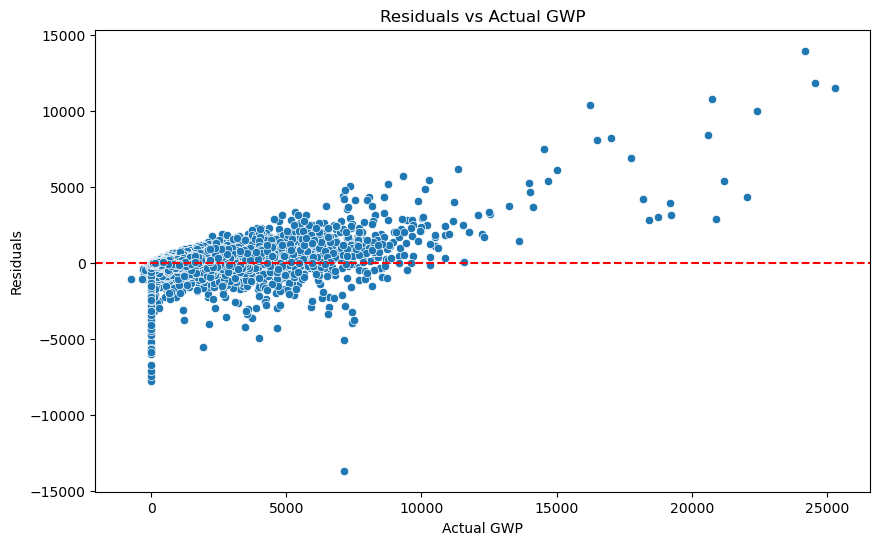

In [329]:
# Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.values, y=comparison_df['Residuals'])
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Actual GWP')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual GWP')
plt.show()

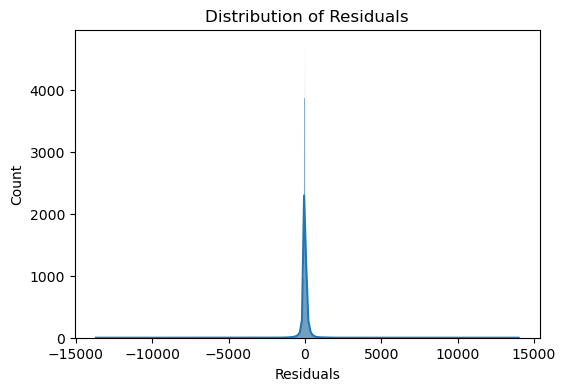

In [330]:
plt.figure(figsize=(6,4))
sns.histplot(comparison_df['Residuals'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

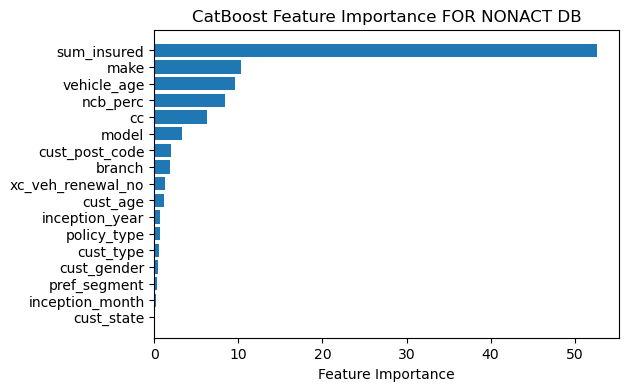

In [328]:
# Get feature importance from the CatBoost model
feature_importances = model.get_feature_importance()

# Create a list of feature names (numerical + categorical)
feature_names = numerical_columns + categorical_columns

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(6,4))
plt.barh(range(len(feature_names)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(feature_names)), np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance FOR NONACT DB')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [147]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [148]:
model2 = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, cat_features=categorical_columns, verbose=100)
model2.fit(X_train2, y_train2)

0:	learn: 125.6922266	total: 1.44s	remaining: 11m 56s
100:	learn: 66.2028280	total: 1m 52s	remaining: 7m 25s
200:	learn: 62.7137204	total: 3m 51s	remaining: 5m 44s
300:	learn: 60.8230445	total: 5m 47s	remaining: 3m 49s
400:	learn: 59.5846522	total: 7m 38s	remaining: 1m 53s
499:	learn: 58.7785316	total: 9m 36s	remaining: 0us


In [149]:
# Make predictions
y_pred2 = model2.predict(X_test2)


In [150]:
# Calculate R-squared and Adjusted R-squared manually
r2 = r2_score(y_test2, y_pred2)
n = len(y_test2)  # Number of samples
p = X_test2.shape[1]  # Number of features

# Adjusted R-squared formula
r2_adj = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('MAE:',metrics['MAE'])
print('MSE:',metrics['MSE'])
print('RMSE:',metrics['RMSE'])
print('R2:',metrics['R2'])
print('Adjusted R^2:',metrics['Adjusted R2'])

MAE: 118.29741157209618
MSE: 82310.80433087578
RMSE: 286.89859590258675
R2: 0.8565936199440243
Adjusted R^2: 0.8565783359222512


In [151]:
comparison_df2 = pd.DataFrame({
    'Actual GWP': y_test2.values,      # Actual values from the test set
    'Predicted GWP': y_pred2,          # Predicted values
    'Residuals': y_test2.values - y_pred2  # Residuals (errors)
})

# Show the first 10 rows of the comparison DataFrame
print(comparison_df2.head(10))

   Actual GWP  Predicted GWP   Residuals
0          84     205.355382 -121.355382
1         173     159.665287   13.334713
2         362     305.906796   56.093204
3         133     138.815633   -5.815633
4         208     193.116613   14.883387
5         278     209.415921   68.584079
6         191     185.503003    5.496997
7           0     125.639819 -125.639819
8         212     202.147818    9.852182
9         393     386.083724    6.916276


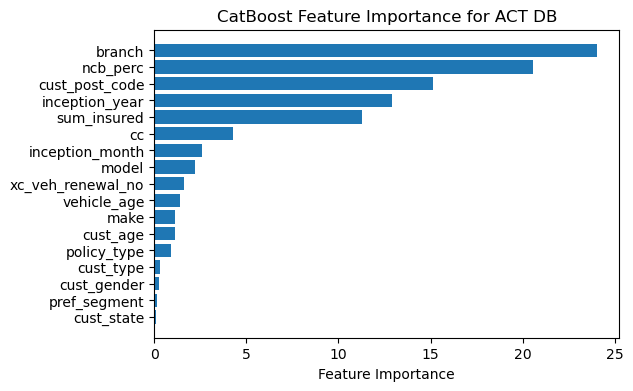

In [152]:
# Get feature importance from the CatBoost model
feature_importances2 = model2.get_feature_importance()

# Create a list of feature names (numerical + categorical)
feature_names2 = numerical_columns2 + categorical_columns2

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances2)[::-1]

# Plot feature importances
plt.figure(figsize=(6,4))
plt.barh(range(len(feature_names2)), feature_importances2[sorted_idx], align='center')
plt.yticks(range(len(feature_names2)), np.array(feature_names2)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance for ACT DB')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [153]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [154]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [283]:
# Label encode categorical features
le = LabelEncoder()
for col in categorical_columns:
    i[col] = le.fit_transform(i[col].astype(str))
    

In [284]:
# Define the target and features
X = i[numerical_columns + categorical_columns]
y = i['gwp']

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [286]:
# Create the LightGBM Dataset for training
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for the LightGBM model
params = {
    'objective': 'regression',  # For regression task
    'metric': 'rmse',           # We use RMSE as a metric for regression
    'boosting_type': 'gbdt',    # Gradient Boosting Decision Trees
    'num_leaves': 31,           # Number of leaves in one tree
    'learning_rate': 0.05,      # Learning rate
    'feature_fraction': 0.9,    # Fraction of features used at each step
}

In [287]:
evals_result = {}

# Train the model and capture evaluation results for plotting the learning curve
lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],  # Include both training and validation sets
    valid_names=['train', 'valid'],     # Names for the datasets
    num_boost_round=1000,                # Maximum number of boosting rounds
    callbacks=[lgb.early_stopping(stopping_rounds=50),  # Stop if no improvement after 50 rounds
               lgb.record_evaluation(evals_result)]  # Record evaluation results
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 974
[LightGBM] [Info] Number of data points in the train set: 636734, number of used features: 17
[LightGBM] [Info] Start training from score 556.113321
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	train's rmse: 226.515	valid's rmse: 257.132


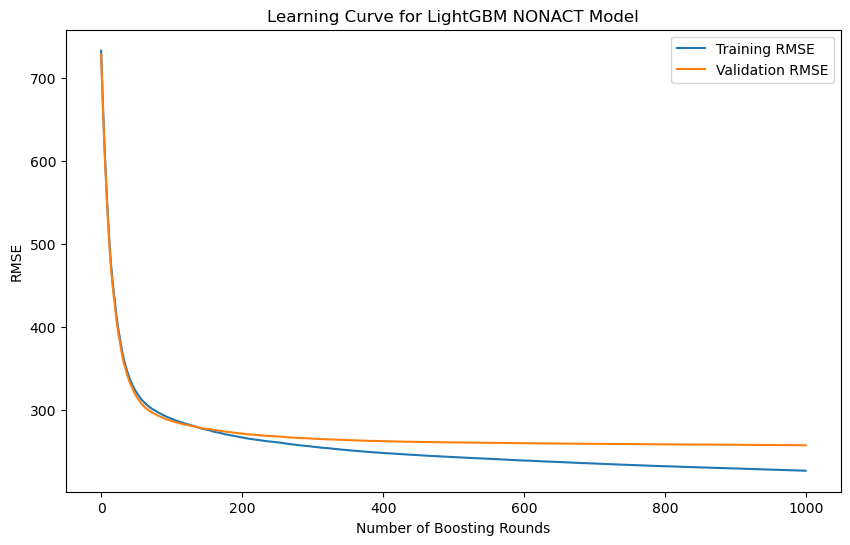

In [288]:
# Plot the learning curve (RMSE vs. Number of Boosting Iterations)
plt.figure(figsize=(10, 6))
plt.plot(evals_result['train']['rmse'], label='Training RMSE')
plt.plot(evals_result['valid']['rmse'], label='Validation RMSE')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Learning Curve for LightGBM NONACT Model')
plt.legend()
plt.show()

In [289]:
# Predict on the test set
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Calculate the performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error (RMSE): 257.13205350744846
R^2 Score: 0.8819685303314426


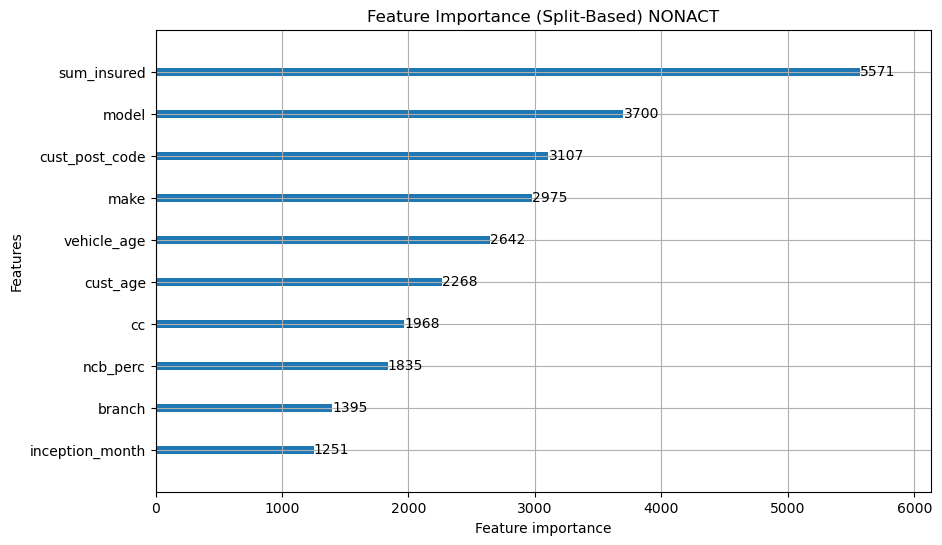

In [290]:
lgb.plot_importance(lgb_model, 
                    max_num_features=10,  # You can change this to show more or fewer features
                    importance_type='split',  # 'split' for feature frequency, 'gain' for average gain
                    figsize=(10, 6))
plt.title('Feature Importance (Split-Based) NONACT')
plt.show()

In [251]:
# Label encode categorical features
le = LabelEncoder()
for col in categorical_columns2:
    j[col] = le.fit_transform(j[col].astype(str))
    

In [252]:
# Define the target and features
X2 = j[numerical_columns2 + categorical_columns2]
y2 = j['gwp']

In [273]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [274]:
# Create the LightGBM Dataset for training
train_data2 = lgb.Dataset(X_train2, label=y_train2)
test_data2 = lgb.Dataset(X_test2, label=y_test2, reference=train_data2)

# Set parameters for the LightGBM model
params = {
    'objective': 'regression',  # For regression task
    'metric': 'rmse',           # We use RMSE as a metric for regression
    'boosting_type': 'gbdt',    # Gradient Boosting Decision Trees
    'num_leaves': 31,           # Number of leaves in one tree
    'learning_rate': 0.05,      # Learning rate
    'feature_fraction': 0.9,    # Fraction of features used at each step
}

In [275]:
evals_result = {}

# Train the model and capture evaluation results for plotting the learning curve
lgb_model2 = lgb.train(
    params,
    train_data2,
    valid_sets=[train_data2, test_data2],  # Include both training and validation sets
    valid_names=['train', 'valid'],     # Names for the datasets
    num_boost_round=400,                # Maximum number of boosting rounds
    callbacks=[lgb.early_stopping(stopping_rounds=50),  # Stop if no improvement after 50 rounds
               lgb.record_evaluation(evals_result)]  # Record evaluation results
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 636336, number of used features: 17
[LightGBM] [Info] Start training from score 199.825180
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[400]	train's rmse: 56.981	valid's rmse: 57.7478


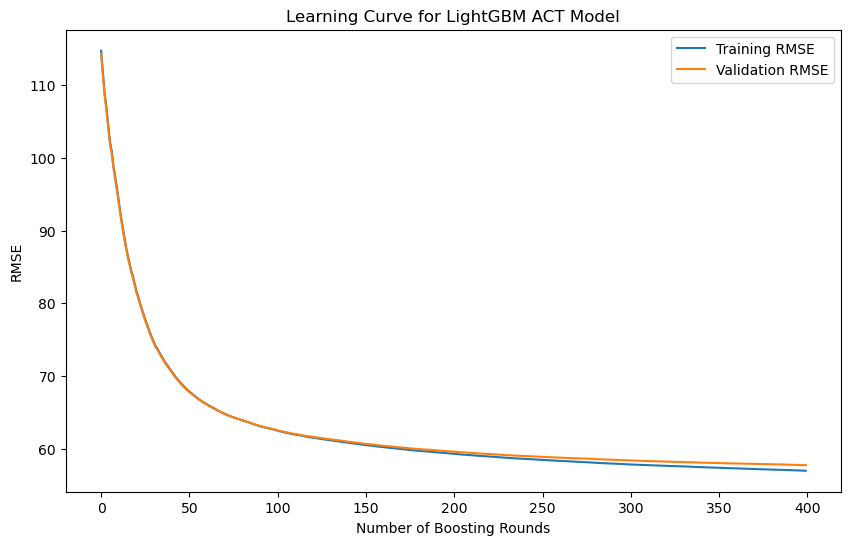

In [276]:
# Plot the learning curve (RMSE vs. Number of Boosting Iterations)
plt.figure(figsize=(10, 6))
plt.plot(evals_result['train']['rmse'], label='Training RMSE')
plt.plot(evals_result['valid']['rmse'], label='Validation RMSE')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Learning Curve for LightGBM ACT Model')
plt.legend()
plt.show()

In [277]:
# Predict on the test set
y_pred2 = lgb_model2.predict(X_test2, num_iteration=lgb_model2.best_iteration)

# Calculate the performance metrics
rmsee = np.sqrt(mean_squared_error(y_test2, y_pred2))
r22 = r2_score(y_test2, y_pred2)

print(f"Root Mean Squared Error (RMSE): {rmsee}")
print(f"R^2 Score: {r22}")

Root Mean Squared Error (RMSE): 57.74777841084236
R^2 Score: 0.7576776572493721


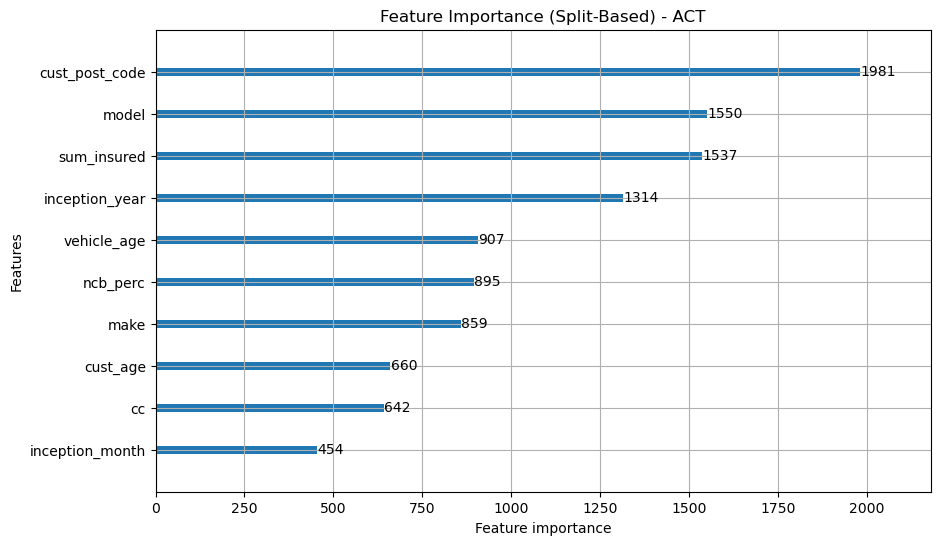

In [278]:
lgb.plot_importance(lgb_model2, 
                    max_num_features=10,  # You can change this to show more or fewer features
                    importance_type='split',  # 'split' for feature frequency, 'gain' for average gain
                    figsize=(10, 6))
plt.title('Feature Importance (Split-Based) - ACT')
plt.show()

In [169]:
mapp = pd.read_csv(r'C:\Users\ananya.datta\Desktop\Project 1 - Predictive Modelling\MST_BRANCH.csv')
mapp

,branch_code,branch_short_desc,branch_long_desc,branch_mgmt_desc,parent_branch_name,channel,source,reporting_line,branch_state,reporting_branch,branch_mgr,ref_main_branch_code,distribution_src_exp_code,branch_business_unit
0,A2,IPOH-MNIB,IPOH-MNIB,Perak,IPOH,Agency,PIB,Branches,Perak,Ipoh,Shirly,A1,AGY-PIB,IP
1,A3,TI,TELUK INTAN,Perak,IPOH,Agency,PIB,Branches,Perak,Ipoh,Shirly,A1,AGY-PIB,IP
2,A4,TAIPING,TAIPING,Perak,TAIPING,Agency,PIB,Branches,Perak,Taiping,Shirly,A4,AGY-PIB,TP
3,A5,IP-AGN2,IPOH AGENCIES 2,Perak,IPOH,Agency,PIB,Branches,Perak,Ipoh,Shirly,A1,AGY-PIB,IP
4,A7,PAMB - IP,PAMB - IPOH,Perak,IPOH,Agency,PAMB,Branches,Perak,Ipoh,Shirly,A1,AGY-PIB,IP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,B8,PJ-AGN2,PETALING JAYA AGENCIES 2,Selangor,PJ1,Agency,PIB,Branches,Selangor,Petaling Jaya,Shirly,B2,AGY-PIB,PJ
112,B9,HQ-exMCIS,HQ exMCIS,Selangor,MISC,Agency,PIB,Branches,Selangor,Petaling Jaya,Shirly,B2,AGY-PIB,PJ
113,ZM,PJ-exMCIS,PETALING JAYA exMCIS,NaN,NaN,Agency,PIB,Branches,Selangor,Petaling Jaya,Shirly,B2,AGY-PIB,PJ
114,B2,PJ,PETALING JAYA,Selangor,PJ1,Agency,PIB,Branches,Selangor,Petaling Jaya,Shirly,B2,AGY-PIB,PJ


In [170]:
mapp['branch_code'].nunique()

116

In [171]:
mapp.columns

Index(['branch_code', 'branch_short_desc', 'branch_long_desc',
       'branch_mgmt_desc', 'parent_branch_name', 'channel', 'source',
       'reporting_line', 'branch_state', 'reporting_branch', 'branch_mgr',
       'ref_main_branch_code', 'distribution_src_exp_code',
       'branch_business_unit'],
      dtype='object')

In [172]:
policy_data['branch'].nunique()

82

In [173]:
# 22
mapp['parent_branch_name'].unique()

array(['IPOH', 'TAIPING', 'MISC', 'KUANTAN', nan, 'BROKING',
       'JOHOR BAHRU', 'MELAKA', 'ALOR SETAR', 'SEREMBAN', 'PENANG',
       'POS MALAYSIA', 'KLANG', 'AFFINITY & PARTNERSHIP', 'KL AGENCY',
       'AGENCIES 3', 'KUCHING', 'KOTA KINABALU', 'PJ1', 'PAMB', 'PJ2',
       'HO-AC', 'HO-SBU'], dtype=object)

In [174]:
mapp['channel'].nunique()


10

In [175]:
mapp['channel'].unique()

array(['Agency', 'Reinsurance', 'Cost Centre', 'Direct', 'Broking', 'POS',
       'ALL', 'Coinsurance', 'MMIP', 'Alternative Channel'], dtype=object)

In [176]:
mapp['source'].unique()


array(['PIB', 'PAMB', 'ALL'], dtype=object)

In [177]:
# 14
mapp['reporting_line'].unique()

array(['Branches', 'Reinsurance', 'Cost Center', 'Broking', 'DBCC',
       'Inhouse & Strategic Alliance', 'PAMB Affinity', 'POS/Affinity',
       'ALL', 'KL Agency', 'MMIP', 'Budget Adjustment',
       'Alternative Channel', 'SBU'], dtype=object)

In [178]:
# 14 
mapp['branch_state'].unique()

array(['Perak', 'Wilayah', 'Pahang', 'Head Office', 'Johor', 'Melaka',
       'Kedah', 'Sarawak', 'Negeri Sembilan', 'Penang', 'ALL', 'Selangor',
       'Sabah', nan, 'HO'], dtype=object)

In [179]:
# 35
mapp['reporting_branch'].unique()

array(['Ipoh', 'Taiping', 'Reinsurance Business', 'Kuantan',
       'Financial Services', 'DBCC', 'Broking',
       'Inhouse & Strategic Alliance', 'Johor Bahru', 'Melaka',
       'Alor Setar', 'Kuching ', 'Agency', 'PAMB - HEAD OFFICE',
       'Seremban', 'Penang', 'ALL', 'Klang', 'Claims Department',
       'Medical Department', 'Underwriting',
       'Operations (Policy Processing)', 'Affinity & Partnership',
       'KL Agencies', 'Kuching', 'Kota Kinabalu', 'Terengganu', 'KL/SEL',
       'MMIP', 'Adjustment', 'Petaling Jaya', 'Kota Bahru', 'HO-AC',
       'Selangor', 'HO-SBU'], dtype=object)

In [180]:
# 16
mapp['branch_mgr'].unique()

array(['Shirly', 'Mohan', 'James', 'Sharmini', 'Tay Yew Lean',
       'Pearly Wong', 'Cheong Yew Wing', 'Jamal', 'ALL', 'Uniss/David',
       'Ng Moon Jen', 'Teoh', 'Noreha', 'Ong Liang Boon', 'HQ', nan, 'WS'],
      dtype=object)

In [181]:
# 26
mapp['ref_main_branch_code'].unique()

array(['A1', 'A4', 'H5', 'C1', nan, 'H1', 'H2', 'H3', 'J1', 'M5', 'K5',
       'Q5', 'L1', 'L2', 'N3', 'P1', 'PA', 'ALL', 'B1', 'G1', 'W1', 'S1',
       'W3', 'W8', 'B2', 'L3', 'AGY-PIB'], dtype=object)

In [182]:
# 11
mapp['distribution_src_exp_code'].unique()

array(['AGY-PIB', 'FCM-PIB', 'ZNA', 'BRK-PIB', 'DIR-PIB', 'STF-PIB',
       'POS-PIB', 'ALL', 'MIP-PIB', 'AGY-PAMB', 'HO-SBU'], dtype=object)

In [183]:
# 21
mapp['branch_business_unit'].unique()

array(['IP', 'TP', 'HO-REINS', 'KN', 'CC-CLCL', 'HO-BRKNG', 'HO-DBCC',
       'JB', 'MC', 'AS', 'KU', 'HO-PAMBAF', 'SN', 'PG', 'HO-AFFINIT',
       'ALL', 'KG', 'HO-KLAGY1', 'KK', 'PJ', 'HO-AC', nan], dtype=object)

In [224]:
branch_mapping = mapp.groupby('reporting_branch')['branch_code'].unique()

# Show the mapping
print(branch_mapping)

reporting_branch
ALL                                                           [**]
Adjustment                                                    [W4]
Affinity & Partnership                                        [G1]
Agency                                                        [L1]
Alor Setar                                [K1, K2, K3, K5, K6, PK]
Broking                                                   [H1, H8]
Claims Department                                             [E1]
DBCC                                                      [E4, H2]
Financial Services                    [D1, JM, MM, N2, E3, R1, W2]
HO-AC                                                         [L3]
HO-SBU                                                        [WS]
Inhouse & Strategic Alliance                                  [H3]
Ipoh                                  [A2, A3, A5, A7, PA, A1, A6]
Johor Bahru                       [J2, J3, J4, J6, J7, J8, PJ, J1]
KL Agencies                       [H4, H7, H9

In [225]:
# Optionally, you can also print the count of unique branch codes for each parent branch:
branch_mapping_count = mapp.groupby('reporting_branch')['branch_code'].nunique()
print(branch_mapping_count)

reporting_branch
ALL                               1
Adjustment                        1
Affinity & Partnership            1
Agency                            1
Alor Setar                        6
Broking                           2
Claims Department                 1
DBCC                              2
Financial Services                7
HO-AC                             1
HO-SBU                            1
Inhouse & Strategic Alliance      1
Ipoh                              7
Johor Bahru                       8
KL Agencies                       8
KL/SEL                            1
Klang                             3
Kota Bahru                        1
Kota Kinabalu                     7
Kuantan                           5
Kuching                           7
Kuching                           1
MMIP                              1
Medical Department                1
Melaka                            8
Operations (Policy Processing)    1
PAMB - HEAD OFFICE                3
Penang     

In [312]:
branch2parent = dict(zip(mapp['branch_code'], mapp['reporting_branch']))
branch2parent

{'A2': 'Ipoh',
 'A3': 'Ipoh',
 'A4': 'Taiping',
 'A5': 'Ipoh',
 'A7': 'Ipoh',
 'A8': 'Taiping',
 'B4': 'Reinsurance Business',
 'B7': 'Reinsurance Business',
 'C2': 'Kuantan',
 'CO': 'Reinsurance Business',
 'D1': 'Financial Services',
 'E4': 'DBCC',
 'H1': 'Broking',
 'H2': 'DBCC',
 'H3': 'Inhouse & Strategic Alliance',
 'H8': 'Broking',
 'J2': 'Johor Bahru',
 'J3': 'Johor Bahru',
 'J4': 'Johor Bahru',
 'J5': 'Melaka',
 'J6': 'Johor Bahru',
 'J7': 'Johor Bahru',
 'J8': 'Johor Bahru',
 'JM': 'Financial Services',
 'K1': 'Alor Setar',
 'K2': 'Alor Setar',
 'K3': 'Alor Setar',
 'K5': 'Alor Setar',
 'K6': 'Alor Setar',
 'KM': 'Kuching ',
 'L1': 'Agency',
 'L2': 'PAMB - HEAD OFFICE',
 'M1': 'Melaka',
 'M2': 'Melaka',
 'M3': 'Melaka',
 'M5': 'Melaka',
 'M6': 'Melaka',
 'M7': 'Melaka',
 'MM': 'Financial Services',
 'N1': 'Seremban',
 'N2': 'Financial Services',
 'N3': 'Seremban',
 'N4': 'Seremban',
 'N5': 'Seremban',
 'P1': 'Penang',
 'P2': 'Penang',
 'P3': 'Penang',
 'P5': 'Penang',
 'P6': 

In [187]:
branches_to_filter = ['W4', 'W3', 'B4', 'B7', 'CO', 'H5', 'H6', 'RM', 'B6']
filtered_rowsNA = i[i['branch'].isin(branches_to_filter)]
filtered_rowsNA

,gwp,sum_insured,branch,cust_type,cust_post_code,cust_state,cust_gender,cust_age,vehicle_age,make,model,cc,policy_type,xc_veh_renewal_no,ncb_perc,pref_segment,inception_year,inception_month


In [188]:
filtered_rowsNA['branch'].value_counts()

Series([], Name: count, dtype: int64)

In [189]:
filtered_rowsA = j[j['branch'].isin(branches_to_filter)]
filtered_rowsA

,gwp,sum_insured,branch,cust_type,cust_post_code,cust_state,cust_gender,cust_age,vehicle_age,make,model,cc,policy_type,xc_veh_renewal_no,ncb_perc,pref_segment,inception_year,inception_month


In [190]:
filtered_rowsA['branch'].unique()

array([], dtype=int32)

To ignore reporting branches - Reinsurance business, Adjustment, MMIP
hence filtering the dataframe based on those branch codes, and remove those rows.

ONLY H5 is present,1705 in NA and 578 in A. so removing those and matching wrt branches.

In [191]:
naDB.shape

(797622, 22)

In [313]:
i.shape

(797622, 18)

In [228]:
j.shape

(795998, 18)

In [314]:
i = i[i['branch'] != 'H5']
j = j[j['branch'] != 'H5']

In [230]:
i.shape

(795918, 18)

In [231]:
j.shape

(795420, 18)

In [315]:
i['branch'] = i['branch'].map(branch2parent)
j['branch'] = j['branch'].map(branch2parent)

In [316]:
i.shape

(795918, 18)

In [317]:
i.columns

Index(['gwp', 'sum_insured', 'branch', 'cust_type', 'cust_post_code',
       'cust_state', 'cust_gender', 'cust_age', 'vehicle_age', 'make', 'model',
       'cc', 'policy_type', 'xc_veh_renewal_no', 'ncb_perc', 'pref_segment',
       'inception_year', 'inception_month'],
      dtype='object')

In [318]:
i.dtypes

gwp                   int64
sum_insured           int64
branch               object
cust_type            object
cust_post_code        int64
cust_state           object
cust_gender          object
cust_age              int64
vehicle_age           int64
make                 object
model                object
cc                   object
policy_type          object
xc_veh_renewal_no     int64
ncb_perc              int64
pref_segment          int64
inception_year        int64
inception_month       int64
dtype: object

#### Trying CATBOOST Model on ACT dataframe after mapping branches from 82->24
#### to improve the feature importance and overfitting

In [236]:
# Define empty lists for numerical and categorical columns
numerical_columns2 = []
categorical_columns2 = []

# Loop through the columns of the DataFrame
for column in j.columns:
    # Check the data type of each column
    if j[column].dtype in ['int64', 'float64']:  # For numerical columns
        numerical_columns2.append(column)
        if j[column].dtype == 'float64':  # If it's a float column, convert to int cz otherwise u get catBoosterror
            j[column] = j[column].astype(np.int64)
    elif j[column].dtype == 'object':  # For categorical columns (string type)
        categorical_columns2.append(column)

In [237]:
numerical_columns2

['gwp',
 'sum_insured',
 'cust_post_code',
 'cust_age',
 'vehicle_age',
 'xc_veh_renewal_no',
 'ncb_perc',
 'pref_segment',
 'inception_year',
 'inception_month']

In [238]:
categorical_columns2

['branch',
 'cust_type',
 'cust_state',
 'cust_gender',
 'make',
 'model',
 'cc',
 'policy_type']

In [239]:
numerical_columns2.pop(0)

'gwp'

In [240]:
# Define the target and features
X2 = j[numerical_columns2 + categorical_columns2]
y2 = j['gwp']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, cat_features=categorical_columns2, verbose=100)
model2.fit(X_train2, y_train2)
# Make predictions
y_pred2 = model2.predict(X_test2)

0:	learn: 111.8673424	total: 713ms	remaining: 5m 55s
100:	learn: 62.0626500	total: 1m 2s	remaining: 4m 6s
200:	learn: 59.4127144	total: 2m 4s	remaining: 3m 5s
300:	learn: 58.1280058	total: 3m 5s	remaining: 2m 2s
400:	learn: 57.4155074	total: 4m 6s	remaining: 1m
499:	learn: 56.9138417	total: 5m 5s	remaining: 0us


In [241]:
categorical_columns2

['branch',
 'cust_type',
 'cust_state',
 'cust_gender',
 'make',
 'model',
 'cc',
 'policy_type']

In [242]:
# Calculate R-squared and Adjusted R-squared manually
r2 = r2_score(y_test2, y_pred2)
n = len(y_test2)  # Number of samples
p = X_test2.shape[1]  # Number of features

# Adjusted R-squared formula
r2_adj = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('MAE:',metrics['MAE'])
print('MSE:',metrics['MSE'])
print('RMSE:',metrics['RMSE'])
print('R2:',metrics['R2'])
print('Adjusted R^2:',metrics['Adjusted R2'])

MAE: 118.29741157209618
MSE: 82310.80433087578
RMSE: 286.89859590258675
R2: 0.8565936199440243
Adjusted R^2: 0.8565783359222512


In [243]:
comparison_df2 = pd.DataFrame({
    'Actual GWP': y_test2.values,      # Actual values from the test set
    'Predicted GWP': y_pred2,          # Predicted values
    'Residuals': y_test2.values - y_pred2  # Residuals (errors)
})

# Show the first 10 rows of the comparison DataFrame
print(comparison_df2.head(10))

   Actual GWP  Predicted GWP   Residuals
0         194     229.624895  -35.624895
1         268     287.183976  -19.183976
2          76      74.069736    1.930264
3         118     152.200437  -34.200437
4         124     136.019102  -12.019102
5         142     144.283852   -2.283852
6         139     123.330120   15.669880
7         115     118.026760   -3.026760
8         324     294.163337   29.836663
9         718     398.574825  319.425175


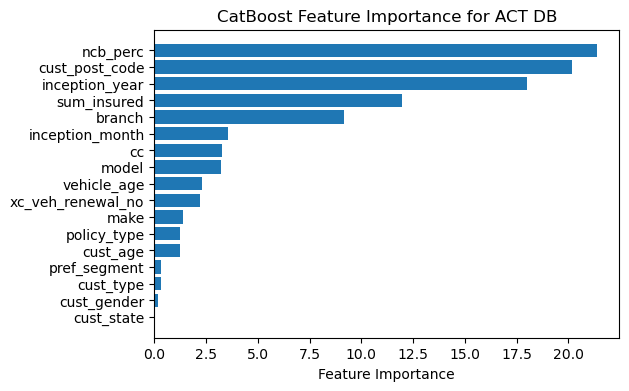

In [244]:
# Get feature importance from the CatBoost model
feature_importances2 = model2.get_feature_importance()

# Create a list of feature names (numerical + categorical)
feature_names2 = numerical_columns2 + categorical_columns2

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances2)[::-1]

# Plot feature importances
plt.figure(figsize=(6,4))
plt.barh(range(len(feature_names2)), feature_importances2[sorted_idx], align='center')
plt.yticks(range(len(feature_names2)), np.array(feature_names2)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance for ACT DB')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


Much better, now that branch came down to 5th and not the 1st important feature in the model training